# Master's Thesis: Empirical Study of Dimensionality Reduction Methodologies for Pose Comparison using Computer Vision

## Introduction

Welcome to this Jupyter Notebook, which serves as the presentation platform for my Master's Thesis titled "Empirical Study of Dimensionality Reduction Methodologies for Pose Comparison using Computer Vision". In this thesis, I have explored the implemention of dimensionality reduction techniques in pose comparison problems for computer vision.

The purpose of this notebook is to provide a comprehensive overview of the work I have done, including the research questions addressed, the methodology employed, and the results obtained. Through this presentation, I aim to showcase the significance and contributions of my research in the field of Computer Vision and highlight the key insights and outcomes.

Throughout this notebook, you will find the code implementations and detailed explanations of the experiments conducted, along with any necessary visualizations and analysis. I have organized the notebook into logical sections, allowing you to navigate through the various aspects of my research smoothly.

## Research Questions

To guide my investigation, I have formulated the following research questions:

1. Is it feasible to use dimensionality reduction algorithms in pose comparison problems?
2. What kind of data is required to address this problem effectively?
3. Which deep learning-based models are appropriate for understanding the correctness of a movement?
4. How can the correctness of a movement be defined?

These questions have driven my research and have shaped the structure of this notebook. I will address each question individually, providing the necessary context, methodologies, and findings.

## Methodology

In this section, I will outline the methodologies and techniques employed in my research. This includes the data collection process, preprocessing steps, model selection, and evaluation metrics. By documenting these details, I aim to provide transparency and reproducibility to my research.

The methodology section will also discuss any relevant theoretical frameworks, algorithms, or models that form the foundation of my work. I will provide explanations and code snippets to demonstrate the implementation of these techniques in Python.

This part will be explained in more detail in the dissertation. Here we are going to focus on the code.

## Results and Analysis

In this section, I will present the results obtained from my experiments and provide a detailed analysis of the findings. I will showcase the performance metrics, visualizations, and any other relevant outputs to support my conclusions.

Furthermore, I will discuss the implications of these results, including their significance in the broader context of the Computer Vision. I will compare and contrast my findings with existing literature and highlight any novel insights or contributions.

## Conclusion

To conclude, this Jupyter Notebook encapsulates the core elements of my Master's Thesis, "Empirical Study of Dimensionality Reduction Methodologies for Pose Comparison using Computer Vision" I have presented the purpose and objectives of my research, outlined the research questions, described the methodology employed, and shared the results and analysis.

By combining code implementations, explanations, and visualizations, I aim to provide a comprehensive and accessible overview of my work. I hope that this notebook effectively communicates the significance and value of my research in the field of Computer Vision and offers insights for future exploration and advancements.

Thank you for your time, and I invite you to navigate through this notebook to explore the various aspects of my Master's Thesis.



---------

## Methodology

In this research, we have implemented the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology on the fit3D dataset. CRISP-DM is a robust and well-proven methodology widely used by data scientist experts. It provides a structured approach to solving data mining problems and encompasses various stages of the data mining process.

By following the CRISP-DM methodology, we aim to ensure a systematic and comprehensive approach to our data mining process. This methodology allows us to leverage feature engineering techniques and explore the importance of different dimensions in the fit3D dataset, ultimately contributing to a better prediction of movement correctness in our classification problem.

### Install dependencies and import libraries

### Data Preparation

This part of the experiment will show the technique used after understanding which one would be the most correct and suitable for this problem, so it could vary depending on the focus that is being sought to achieve the goals and does not follow always a constant pattern.

First step done was to considerate the dependencies and libraries to be installed and imported

In [1]:
"""#Install requiered dependencies/libraries
!pip install tensorflow
!pip install keras
!pip install hmmlearn
!pip install matplotlib
"""


'#Install requiered dependencies/libraries\n!pip install tensorflow\n!pip install keras\n!pip install hmmlearn\n!pip install matplotlib\n'

In [1]:
#Import requiered  installed libraries
import os
import cv2
import json
import csv
import numpy as np
import pandas as pd
import mediapipe as mp
import tensorflow as tf
import matplotlib.pyplot as plt
import time
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from scipy.signal import argrelextrema
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from scipy.stats import f_oneway, kruskal






#from hmmlearn import hmm

#### Loading & Preprocessing the dataset
In this project, the main objective is to identify the key features that contribute to the correctness of the squat exercise. The dataset, known as 3DFit, consists of frames capturing different movements performed by a subject. Each frame provides the coordinates for 3D skeletons with 25 joints, including the 17 Human3.6m joints. We are specifically interested in analyzing the squat exercise among the various exercises present in the dataset. The landmarks included in the dataset can be found here:

0. Hip
1. Left Hip
2. Left Knee
3. Left Ankle
4. Right Hip
5. Right Knee
6. Right Ankle
7. Spine
8. Neck / Upper Torso
9. Head
10. Head Top
11. Left Shoulder
12. Left Elbow
13. Left Wrist
14. Right Shoulder
15. Right Elbow
16. Right Wrist
17. Left Toe
18. Tip of Left Foot
19. Right Toe
20. Tip of Right Foot
21. Left Thumb
22. Tip of Left Hand
23. Right Thumb
24. Tip of Right Hand

The coordinates of these landmarks are defined in the XYZ format. 

In the upcoming sections, we will load and process the dataset, performing necessary data preprocessing steps, and leveraging the provided landmark coordinates to engineer meaningful features. These features will play a crucial role in understanding movement correctness and addressing our research questions effectively.

First some constants variables are going to be defined

In [2]:
# Constants
exercise = "squat"

# Specify the data directory
data_dir = "/Users/daniel/Documents/Fin de Master/TFM/datasets/fit3D/train"

In [3]:
# Define the connections between two joints

connections = [('Hip', 'LHip'), ('LHip', 'LKnee'), ('LKnee', 'LAnkle'),
               ('Hip', 'RHip'), ('RHip', 'RKnee'), ('RKnee', 'RAnkle'),
               ('Hip', 'Spine'), ('Spine', 'Neck'), ('Neck', 'Head'),
               ('Head', 'HeadTop'), ('Neck', 'LShoulder'), ('LShoulder', 'LElbow'),
               ('LElbow', 'LWrist'), ('Neck', 'RShoulder'), ('RShoulder', 'RElbow'),
               ('RElbow', 'RWrist'), ('LAnkle', 'LToe'), ('LToe', 'TipLToe'),
               ('RAnkle', 'RToe'), ('RToe', 'TipRToe'), ('LWrist', 'LThumb'),
               ('LWrist', 'TipLHand'), ('RWrist', 'RThumb'), ('RWrist', 'TipRHand')]

In [4]:
# Define the connections between three joints directly connected

jointsConnections = [(0,1,2), (1,2,3), (2,3,17),
               (2,3,18), (0,4,5), (4,5,6),
               (5,6,19), (5,6,20), (1,0,7),
               (4,0,7), (0,7,8), (7,8,9),
               (8,9,10), (8,11,12), (11,12,13),
               (12,13,21), (12,13,22), (8,14,15),
               (14,15,16), (15,16,23), (15,16,24),
               (7,8,11), (7,8,14), (11,8,9), (14,8,9)]

In [5]:
# Set up notebook
pd.set_option('display.max_columns', None)

To begin our data analysis, we will define essential functions to prepare and enhance the readability of our dataset.

First and foremost, we will define the function **calculate_angle** to calculate the angles between the joints of the 3D Skeleton for each frame in our dataset. This function plays a pivotal role in our analysis as we leverage these angles to gain insights into the correctness of the movements. By quantifying the angles between joints, we can extract valuable information about the body posture and motion dynamics.

The calculation of these angles is a crucial step in our data processing pipeline, as it forms the foundation for subsequent analyses. These angles provide a measurable metric to evaluate the movement correctness, which is a key aspect of our research objectives.

By performing angle calculations on the 3D Skeleton data, we can unlock valuable insights into the movements under consideration, enabling us to better understand their correctness and make informed decisions based on this analysis.

In [6]:
def calculate_angle(a, b, c):
    """
    Calculate the angle (in degrees) between three points represented as vectors.

    Parameters:
    a (array-like): Coordinates of the first point.
    b (array-like): Coordinates of the middle point.
    c (array-like): Coordinates of the last point.

    Returns:
    float: The angle (in degrees) between the vectors formed by the points.
    """
    a = np.array(a)  # First
    b = np.array(b)  # Mid
    c = np.array(c)  # End

    ba = a - b
    bc = c - b

    dot_product = np.dot(ba, bc)
    norm_product = np.linalg.norm(ba) * np.linalg.norm(bc)

    cos_theta = dot_product / norm_product
    angle_rad = np.arccos(cos_theta)
    angle_deg = round(np.degrees(angle_rad), 6)

    return angle_deg



The **process_json_files** function parses JSON files within a specified directory and extracts pose data ready to be converted into a dataframe. It calculates angles between consecutive joints and organizes the extracted data into three separate lists: 'data', 'raw_data', and 'jangles'. 'data' contains complete pose data with labels, folder names, flattened coordinates, and angles. 'raw_data' includes pose data without the calculated angles, while 'jangles' stores pose data with only the calculated angles. This function facilitates the processing and analysis of pose data from JSON files for further research and modeling purposes.

In [7]:
def process_json_files(data_dir):
    """
    This function iterates over the folders in the data directory and extracts pose data from the JSON files.
    It calculates angles between consecutive joints and organizes the extracted data in separate lists.
    
    Parameters:
    data_dir (str): The path to the directory containing the JSON files.

    Returns:
    three lists: 'data', 'raw_data', and 'jangles'.
        - 'data' contains the complete pose data, including labels, folder names, flattened coordinates, and angles.
        - 'raw_data' contains pose data without the calculated angles.
        - 'jangles' contains pose data with only the calculated angles.

    """
    data = []
    raw_data = []
    jangles = []

    # Iterate over the folders in the data directory
    for folder_name in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder_name)

        # Skip non-directory files (e.g., .DS_Store)
        if not os.path.isdir(folder_path):
            continue

        # Determine the label based on whether it's the trainer or trainee folder
        if folder_name == "s08":
            label = "correct"
        else:
            label = "incorrect"

        # Path to the joints3d_25 folder
        joints3d_path = os.path.join(folder_path, "joints3d_25")

        # Iterate over the files in the joints3d_25 folder
        for filename in os.listdir(joints3d_path):
            if filename.endswith(".json") and filename != ".DS_Store" and filename.startswith("squat"):
                file_path = os.path.join(joints3d_path, filename)
                # Open and parse the JSON file
                with open(file_path, "r") as f:
                    json_data = json.load(f)

                # Extract skeleton coordinates for each frame
                for frame_data in json_data["joints3d_25"]:
                    pose_data = []
                    
                    # Extract coordinates for each body part
                    for part_coords in frame_data:
                        pose_data.append(part_coords)
                    
                    # Calculate angles between consecutive joints
                    angles = []
                    coordinates = []
                    for coor in jointsConnections:
                        coord1 = pose_data[coor[0]]
                        coord2 = pose_data[coor[1]]
                        coord3 = pose_data[coor[2]]
                        angle = calculate_angle(coord1, coord2, coord3)
                        angles.append(angle)
                    flat_coord = [item for sublist in pose_data for item in sublist]
                    data.append([label]+ [folder_name]+ flat_coord + angles)
                    raw_data.append([label]+ [folder_name]+ flat_coord)
                    jangles.append([label]+ [folder_name]+ angles)
    return data, raw_data, jangles

The function **save_data_to_csv** takes a two-dimensional iterable of data and saves it to a CSV file specified by the filename. It provides a convenient way to store data in CSV format for further analysis or sharing.

In [8]:
def save_data_to_csv(data, filename):
    """
    This function takes the provided data and saves it to a CSV file specified by the filename.
    The data should be a two-dimensional iterable, where each row represents a row in the CSV file.
    
    Parameters:
    data (iterable): The data to be saved to the CSV file.
    filename (str): The name or path of the CSV file to be created or overwritten.

    Returns:
    None
    """
    with open(filename, "w", newline="") as file:
        writer = csv.writer(file)
        writer.writerows(data)

The data is going to be converted into a pandas Dataframe to allow us further exploration

In [9]:
# Process the JSON files and create the data variable, with the complete information for the pose landmarks coordinates and angles. Raw_data is going to contain only the coordinates and angles only the angles extracted from the coordinates
data, raw_data, angles = process_json_files(data_dir)

# Save data to a CSV file
filename = "angles.csv"
save_data_to_csv(angles, filename)
filename = "data.csv"
save_data_to_csv(data, filename)
filename = "raw_data.csv"
save_data_to_csv(raw_data, filename)

The data variables is going to be used to produce a pandas dataframe with all the labels for further analysis

In [10]:
df_raw = pd.DataFrame(list(data))

In [11]:
df_raw.columns = ['Correctness','Subject','Hip_x','Hip_y','Hip_z','LHip_x','LHip_y','LHip_z','LKnee_x','LKnee_y','LKnee_z','LAnkle_x','LAnkle_y','LAnkle_z',\
              'RHip_x','RHip_y','RHip_z','RKnee_x','RKnee_y','RKnee_z','RAnkle_x','RAnkle_y','RAnkle_z',\
              'Spine_x','Spine_y','Spine_z','Neck_x','Neck_y','Neck_z','Head_x','Head_y','Head_z',\
              'HeadTop_x','HeadTop_y','HeadTop_z','LShoulder_x','LShoulder_y','LShoulder_z','LElbow_x','LElbow_y','LElbow_z',\
              'LWrist_x','LWrist_y','LWrist_z','RShoulder_x','RShoulder_y','RShoulder_z','RElbow_x','RElbow_y','RElbow_z',\
              'RWrist_x','RWrist_y','RWrist_z','LToe_x','LToe_y','LToe_z','TipLToe_x','TipLToe_y','TipLToe_z',\
              'RToe_x','RToe_y','RToe_z','TipRToe_x','TipRToe_y','TipRToe_z','LThumb_x','LThumb_y','LThumb_z',\
              'TipLHand_x','TipLHand_y','TipLHand_z','RThumb_x','RThumb_y','RThumb_z','TipRHand_x','TipRHand_y','TipRHand_z',\
              'Hip_LHip_LKnee', 'LHip_LKnee_LAnkle', 'LKnee_LAnkle_LToe', 'LKnee_LAnkle_TLFoot', 'Hip_RHip_RKnee', 'RHip_RKnee_RAnkle',\
              'RKnee_RAnkle_RToe', 'RKnee_RAnkle_TRFoot', 'LHip_Hip_Spine', 'RHip_Hip_Spine', 'Hip_Spine_Neck', 'Spine_Neck_Head', 'Neck_Head_HTop', 'Neck_LShoulder_LElbow',\
              'LShoulder_LElbow_LWrist', 'LElbow_LWrist_LThumb', 'LElbow_LWrist_TLHand', 'Neck_RShoulder_RElbow',\
              'RShoulder_RElbow_RWrist', 'RElbow_RWrist_RThumb', 'RElbow_RWrist_TRHand', 'Spine_Neck_LShoulder','Spine_Neck_RShoulder',\
              'LShoulder_Neck_Head', 'RShoulder_Neck_Head']

In [12]:
df_raw

,Correctness,Subject,Hip_x,Hip_y,Hip_z,LHip_x,LHip_y,LHip_z,LKnee_x,LKnee_y,LKnee_z,LAnkle_x,LAnkle_y,LAnkle_z,RHip_x,RHip_y,RHip_z,RKnee_x,RKnee_y,RKnee_z,RAnkle_x,RAnkle_y,RAnkle_z,Spine_x,Spine_y,Spine_z,Neck_x,Neck_y,Neck_z,Head_x,Head_y,Head_z,HeadTop_x,HeadTop_y,HeadTop_z,LShoulder_x,LShoulder_y,LShoulder_z,LElbow_x,LElbow_y,LElbow_z,LWrist_x,LWrist_y,LWrist_z,RShoulder_x,RShoulder_y,RShoulder_z,RElbow_x,RElbow_y,RElbow_z,RWrist_x,RWrist_y,RWrist_z,LToe_x,LToe_y,LToe_z,TipLToe_x,TipLToe_y,TipLToe_z,RToe_x,RToe_y,RToe_z,TipRToe_x,TipRToe_y,TipRToe_z,LThumb_x,LThumb_y,LThumb_z,TipLHand_x,TipLHand_y,TipLHand_z,RThumb_x,RThumb_y,RThumb_z,TipRHand_x,TipRHand_y,TipRHand_z,Hip_LHip_LKnee,LHip_LKnee_LAnkle,LKnee_LAnkle_LToe,LKnee_LAnkle_TLFoot,Hip_RHip_RKnee,RHip_RKnee_RAnkle,RKnee_RAnkle_RToe,RKnee_RAnkle_TRFoot,LHip_Hip_Spine,RHip_Hip_Spine,Hip_Spine_Neck,Spine_Neck_Head,Neck_Head_HTop,Neck_LShoulder_LElbow,LShoulder_LElbow_LWrist,LElbow_LWrist_LThumb,LElbow_LWrist_TLHand,Neck_RShoulder_RElbow,RShoulder_RElbow_RWrist,RElbow_RWrist_RThumb,RElbow_RWrist_TRHand,Spine_Neck_LShoulder,Spine_Neck_RShoulder,LShoulder_Neck_Head,RShoulder_Neck_Head
0,incorrect,s05,-0.165455,0.146322,0.980330,-0.163326,0.281755,0.965482,-0.220578,0.297809,0.511259,-0.269551,0.312872,0.054917,-0.168083,0.010700,0.993252,-0.208172,-0.021329,0.538036,-0.271439,-0.056099,0.084538,-0.169994,0.142499,1.21765,-0.158774,0.159983,1.46773,-0.091763,0.157925,1.56727,-0.162881,0.172428,1.65647,-0.166961,0.280542,1.40084,-0.189202,0.371295,1.14083,-0.123014,0.429219,0.903067,-0.175534,0.033351,1.41520,-0.220584,-0.093274,1.17381,-0.160535,-0.163108,0.937615,-0.110449,0.353319,0.039986,-0.038073,0.372947,0.041228,-0.118389,-0.108607,0.053056,-0.048603,-0.135852,0.049494,-0.035353,0.388019,0.927926,-0.084037,0.459722,0.816174,-0.067718,-0.131861,0.957830,-0.117463,-0.212983,0.816936,98.101354,178.934270,89.721081,87.819958,88.684418,177.079462,94.864875,92.382427,97.194505,83.615532,173.868292,148.248503,107.209704,138.353545,159.497419,84.352106,170.544540,140.560181,154.373659,86.872246,172.664896,64.882441,63.363215,116.728133,111.560749
1,incorrect,s05,-0.165206,0.146329,0.980305,-0.163012,0.281761,0.965453,-0.220518,0.297833,0.511263,-0.269538,0.312887,0.054926,-0.167900,0.010708,0.993230,-0.208019,-0.021329,0.538018,-0.271439,-0.056110,0.084542,-0.169810,0.142571,1.21762,-0.158509,0.160069,1.46770,-0.091501,0.158031,1.56724,-0.162621,0.172514,1.65645,-0.166723,0.280637,1.40083,-0.189097,0.371368,1.14083,-0.122969,0.429332,0.903053,-0.175317,0.033449,1.41516,-0.220521,-0.093173,1.17379,-0.160261,-0.162934,0.937632,-0.110453,0.353399,0.039974,-0.038107,0.373108,0.041580,-0.118396,-0.108625,0.053036,-0.048622,-0.135917,0.049603,-0.035329,0.388032,0.927823,-0.084025,0.459852,0.816151,-0.067361,-0.132086,0.958078,-0.117130,-0.212867,0.816997,98.100839,178.907914,89.723440,87.734455,88.686678,177.064027,94.855846,92.341546,97.181246,83.629129,173.857827,148.269338,107.215734,138.341444,159.487717,84.367581,170.549541,140.569332,154.293875,86.874262,172.646481,64.893623,63.352414,116.718688,111.586378
2,incorrect,s05,-0.164474,0.146397,0.980226,-0.162208,0.281830,0.965397,-0.220217,0.297882,0.511270,-0.269499,0.312904,0.054960,-0.167240,0.010776,0.993129,-0.207427,-0.021265,0.537923,-0.271458,-0.056121,0.084538,-0.169363,0.143052,1.21754,-0.157909,0.160223,1.46764,-0.090869,0.158138,1.56716,-0.161970,0.172706,1.65636,-0.166064,0.280845,1.40086,-0.188708,0.371627,1.14089,-0.123007,0.429723,0.903033,-0.174787,0.033616,1.41509,-0.220217,-0.092914,1.17372,-0.159469,-0.162651,0.937674,-0.110418,0.353411,0.039966,-0.038069,0.373115,0.041515,-0.118417,-0.108628,0.053009,-0.048643,-0.135917,0.049548,-0.035351,0.388131,0.927250,-0.084387,0.460484,0.816072,-0.066527,-0.132175,0.958482,-0.116143,-0.212410,0.817038,98.082912,178.877407,89.705445,87.725122,88.699244,176.994902,94.793528,92.284006,97.073443,83.736217,173.932045,148.292887,107.196071,138.308524,159.533078,84.528123,17

The train dataset contains 10826 rows and 102 columns, with 75 landmarks divided in the respective coordinates XYZ, the correctness of the subject frame based on whether it is from a trainer or trainee, the subject indeed and 25 columns with the angles between the different joints that are directly connected in the 3D Skeleton. 

The first step when trying to explore the data can is going to be the analysis of the composition regarding the target label in our dataset. As we are trying to understand the correctness of our data, we are going to take the trainer as an example of what we understand about a correct movement and the rest of the subjects as incorrect. This is a first consideration as we explore the best strategy to find correctness.

A function called **plot_bar_graph** is going to be defined to plot a graphd from the correctnes column, as this column is going to be plotted several time as we start to understand the correctness in our analysis

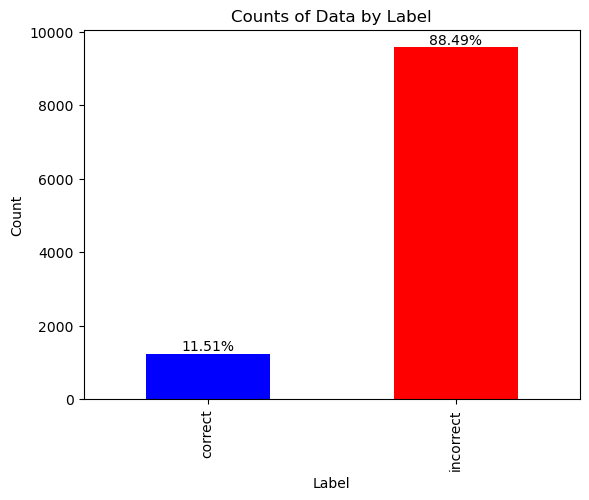

In [13]:
def plot_bar_graph(df):
    """
    Plot a bar graph to display the counts of data by label.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
    None
    """
    # Group the data by the labels and calculate the count for each label
    grouped_data = df['Correctness'].groupby(df['Correctness']).count()

    # Calculate the total count
    total_count = grouped_data.sum()

    # Calculate the percentage for each label
    percentage = grouped_data / total_count * 100

    # Define the colors for the bars
    colors = ['blue', 'red']

    # Plot the bar graph
    grouped_data.plot(kind='bar', color=colors)

    # Add the percentage labels to the bars
    for i, val in enumerate(grouped_data):
        plt.text(i, val, f"{percentage[i]:.2f}%", ha='center', va='bottom')

    # Customize the plot
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title('Counts of Data by Label')

    # Display the plot
    plt.show()

plot_bar_graph(df_raw)


The dataset exhibits an imbalance due to having only one trainer among a total of eight subjects. This observation highlights the need to address the issue of class imbalance. Considering the trainer's movements as the reference for correctness, it is noteworthy that only 11.51% of the total rows are classified as correct in this initial analysis. To tackle this challenge, we will employ various techniques such as error calculation using MJPE (Mean Joint Percentage Error) and MAPE (Mean Angle Percentage Error), as well as oversampling of the minority class. These approaches aim to mitigate the impact of class imbalance and enhance the effectiveness of the subsequent analysis. For that reason we extract from the dataframe only the rows where we have the movement classified as correct and we create a new dataframe named df_minor_class.

In [14]:
# Rows with correct label are extracted
df_minor_class = df_raw[df_raw["Correctness"] == "correct"]

#Only columns with the coordinates for the landmarks are extracted
df_minor_class_coord = df_minor_class.iloc[:,2:77]

#### Oversampling data

The **interpolate_frames** function is used to apply oversampling to the minority class by generating synthetic data through linear interpolation. It takes a DataFrame containing sequential frames as input and performs interpolation to generate a specified number of intermediate frames between each pair of consecutive frames.

The formula used for interpolation is based on linear interpolation, which calculates the intermediate values between two given points. In this case, for each pair of consecutive frames, the function determines the interpolation factor, which ranges from 0 to 1, representing the proportion of the interpolation progress. This helps to increase the representation of the minority class and provides additional training instances for better model performance.

In [15]:
def interpolate_frames(df, num_intermediate_frames):
    """
    This function takes a DataFrame 'df' containing sequential frames and performs interpolation
    to generate a specified number of intermediate frames between each pair of consecutive frames.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing sequential frames.
    num_intermediate_frames (int): The number of intermediate frames to be generated between each pair of consecutive frames.

    Returns:
    The DataFrame with interpolated frames.
    """
    interpolated_frames = []
    
    for i in range(len(df) - 1):
        current_frame = df.iloc[i]
        next_frame = df.iloc[i + 1]
        
        for j in range(num_intermediate_frames):
            interpolation_factor = j + 1 / (num_intermediate_frames + 1)
            
            interpolated_frame = pd.Series(dtype='float64')
            for column in df.columns:
                if column.endswith('x') or column.endswith('y') or column.endswith('z'):
                    interpolated_value = current_frame[column] + (next_frame[column] - current_frame[column]) * interpolation_factor
                else:
                    interpolated_value = current_frame[column]
                interpolated_frame[column] = interpolated_value
            
            interpolated_frames.append(interpolated_frame)
    
    interpolated_df = pd.DataFrame(interpolated_frames, columns=df.columns)
    return interpolated_df


In [16]:
df_inter = interpolate_frames(df_minor_class_coord, 1)

In [17]:
df_inter

,Hip_x,Hip_y,Hip_z,LHip_x,LHip_y,LHip_z,LKnee_x,LKnee_y,LKnee_z,LAnkle_x,LAnkle_y,LAnkle_z,RHip_x,RHip_y,RHip_z,RKnee_x,RKnee_y,RKnee_z,RAnkle_x,RAnkle_y,RAnkle_z,Spine_x,Spine_y,Spine_z,Neck_x,Neck_y,Neck_z,Head_x,Head_y,Head_z,HeadTop_x,HeadTop_y,HeadTop_z,LShoulder_x,LShoulder_y,LShoulder_z,LElbow_x,LElbow_y,LElbow_z,LWrist_x,LWrist_y,LWrist_z,RShoulder_x,RShoulder_y,RShoulder_z,RElbow_x,RElbow_y,RElbow_z,RWrist_x,RWrist_y,RWrist_z,LToe_x,LToe_y,LToe_z,TipLToe_x,TipLToe_y,TipLToe_z,RToe_x,RToe_y,RToe_z,TipRToe_x,TipRToe_y,TipRToe_z,LThumb_x,LThumb_y,LThumb_z,TipLHand_x,TipLHand_y,TipLHand_z,RThumb_x,RThumb_y,RThumb_z,TipRHand_x,TipRHand_y,TipRHand_z
0,-0.194386,0.127296,0.900429,-0.210833,0.260707,0.884358,-0.289407,0.249159,0.462236,-0.342128,0.241714,0.024670,-0.178241,-0.006372,0.914541,-0.245470,-0.014440,0.490385,-0.339274,-0.028529,0.059918,-0.253026,0.073513,1.056775,-0.219207,0.131352,1.312530,-0.154225,0.135394,1.367870,-0.223227,0.126871,1.459475,-0.246711,0.216874,1.243525,-0.298164,0.334064,1.031060,-0.245824,0.392240,0.803255,-0.220772,0.032131,1.257895,-0.246829,-0.098325,1.048550,-0.198309,-0.156206,0.819825,-0.195874,0.287519,0.024077,-0.123957,0.307319,0.016267,-0.191263,-0.059121,0.034521,-0.119616,-0.072026,0.016490,-0.149449,0.366728,0.811058,-0.235724,0.400060,0.704074,-0.101678,-0.131225,0.826011,-0.185959,-0.170247,0.683603
1,-0.194289,0.127289,0.900413,-0.210758,0.260697,0.884346,-0.289374,0.249149,0.462232,-0.342131,0.241712,0.024670,-0.178122,-0.006378,0.914521,-0.245406,-0.014459,0.490374,-0.339272,-0.028534,0.059920,-0.252856,0.073449,1.056765,-0.218999,0.131256,1.312525,-0.153975,0.135203,1.367825,-0.222920,0.126782,1.459475,-0.246512,0.216779,1.243520,-0.298075,0.334025,1.031115,-0.245812,0.392286,0.803315,-0.220614,0.032040,1.257880,-0.246766,-0.098443,1.048565,-0.198280,-0.156395,0.819851,-0.195873,0.287502,0.024060,-0.123953,0.307303,0.016278,-0.191260,-0.059124,0.034520,-0.119612,-0.072030,0.016493,-0.149449,0.366714,0.811069,-0.235746,0.400139,0.704133,-0.101720,-0.131123,0.825963,-0.185968,-0.170490,0.683631
2,-0.194200,0.127260,0.900406,-0.210659,0.260669,0.884337,-0.289321,0.249135,0.462232,-0.342134,0.241720,0.024676,-0.178043,-0.006408,0.914515,-0.245395,-0.014478,0.490379,-0.339270,-0.028525,0.059926,-0.252659,0.073363,1.056780,-0.218699,0.131153,1.312530,-0.153643,0.134962,1.367800,-0.222536,0.126650,1.459500,-0.246242,0.216678,1.243535,-0.297901,0.333976,1.031185,-0.245767,0.392305,0.803373,-0.220365,0.031947,1.257865,-0.246607,-0.098568,1.048585,-0.198183,-0.156659,0.819892,-0.195881,0.287523,0.024076,-0.123964,0.307315,0.016251,-0.191262,-0.059126,0.034522,-0.119616,-0.072035,0.016487,-0.149411,0.366703,0.811113,-0.235714,0.400153,0.704189,-0.101666,-0.131200,0.825937,-0.185895,-0.170895,0.683684
3,-0.194123,0.127255,0.900399,-0.210578,0.260665,0.884335,-0.289280,0.249135,0.462236,-0.342127,0.241728,0.024685,-0.177972,-0.006414,0.914504,-0.245410,-0.014480,0.490381,-0.339272,-0.028516,0.059925,-0.252529,0.073304,1.056775,-0.218502,0.131092,1.312515,-0.153341,0.135000,1.367650,-0.222092,0.126599,1.459455,-0.246042,0.216647,1.243560,-0.297738,0.333959,1.031225,-0.245700,0.392306,0.803394,-0.220170,0.031873,1.257875,-0.246431,-0.098653,1.048600,-0.198089,-0.156853,0.819921,-0.195869,0.287517,0.024070,-0.123951,0.307307,0.016245,-0.191263,-0.059119,0.034524,-0.119620,-0.072026,0.016481,-0.149326,0.366764,0.811120,-0.235672,0.400137,0.704206,-0.101548,-0.131475,0.825915,-0.185859,-0.171208,0.683720
4,-0.194012,0.127240,0.900384,-0.210439,0.260655,0.884324,-0.289243,0.249130,0.462245,-0.342128,0.241733,0.024698,-0.177889,-0.006432,0.914484,-0.245360,-0.014486,0.490366,-0.339283,-0.028519,0.059923,-0.252302,0.073237,1.056780,-0.218227,0.131031,1.312515,-0.152999,0.134951,1.367570,-0.221655,0.126528,1.459445,-0.245757,0.216601,1.243580,-0.297498,0.333931,1.031260,-0.245524,0.392237,0.803406,-0.219917,0.031809,1.257885,-0.246235,-0.098772,1.048650,-0.197995,-0.157048,0.819970,-0.195862,0.

A new dataframe is created with synthetic data for what is considered a correct movement. A total of 1245 rows and 75 columns compose this new dataframe with correct synthetic data. With this new dataset we are able to balance the compensate the lack of correct data. The calculation of the angles between the joints is going to be performed and both dataset are going to be merged 

In [18]:
inter_data = []
inter_angles = []

In [19]:
def synth_data_process(df_inter, correctness, subject):
    """
    Process synthetic data from a dataframe of joint coordinates and calculate angles between consecutive joints.

    Args:
        df_inter (pandas.DataFrame): DataFrame containing joint coordinates.
        correctness (str): Correctness label for the data.
        subject (str): Subject identifier.

    Returns:
        tuple: Tuple containing two lists:
            - inter_data: List of processed data including correctness label, subject identifier, flattened joint coordinates, and angles.
            - inter_angles: List of processed data including correctness label, subject identifier, and angles.

    """
    inter_data = []
    inter_angles = []

    # Iterate over the rows
    for index, frame_inter in df_inter.iterrows():
        pose_data = []
        inter_coord = [frame_inter[i:i+3] for i in range(0,len(frame_inter),3)]

        # Extract coordinates for each body part
        for part_coords in inter_coord:
            pose_data.append(part_coords)

        # Calculate angles between consecutive joints
        angles = []
        coordinates = []
        for coor in jointsConnections:
            coord1 = pose_data[coor[0]]
            coord2 = pose_data[coor[1]]
            coord3 = pose_data[coor[2]]
            angle = calculate_angle(coord1, coord2, coord3)
            angles.append(angle)

        flat_coord = [item for sublist in pose_data for item in sublist]
        inter_data.append([correctness]+ [subject]+ flat_coord + angles)
        inter_angles.append([correctness]+ [subject]+ angles)
    
    return inter_data, inter_angles

In [20]:
inter_data, inter_angles = synth_data_process(df_inter,"correct","sInter")

In [21]:
df_synth_correct = pd.DataFrame(list(inter_data), columns=df_raw.columns)

In [22]:
df_synth_correct

,Correctness,Subject,Hip_x,Hip_y,Hip_z,LHip_x,LHip_y,LHip_z,LKnee_x,LKnee_y,LKnee_z,LAnkle_x,LAnkle_y,LAnkle_z,RHip_x,RHip_y,RHip_z,RKnee_x,RKnee_y,RKnee_z,RAnkle_x,RAnkle_y,RAnkle_z,Spine_x,Spine_y,Spine_z,Neck_x,Neck_y,Neck_z,Head_x,Head_y,Head_z,HeadTop_x,HeadTop_y,HeadTop_z,LShoulder_x,LShoulder_y,LShoulder_z,LElbow_x,LElbow_y,LElbow_z,LWrist_x,LWrist_y,LWrist_z,RShoulder_x,RShoulder_y,RShoulder_z,RElbow_x,RElbow_y,RElbow_z,RWrist_x,RWrist_y,RWrist_z,LToe_x,LToe_y,LToe_z,TipLToe_x,TipLToe_y,TipLToe_z,RToe_x,RToe_y,RToe_z,TipRToe_x,TipRToe_y,TipRToe_z,LThumb_x,LThumb_y,LThumb_z,TipLHand_x,TipLHand_y,TipLHand_z,RThumb_x,RThumb_y,RThumb_z,TipRHand_x,TipRHand_y,TipRHand_z,Hip_LHip_LKnee,LHip_LKnee_LAnkle,LKnee_LAnkle_LToe,LKnee_LAnkle_TLFoot,Hip_RHip_RKnee,RHip_RKnee_RAnkle,RKnee_RAnkle_RToe,RKnee_RAnkle_TRFoot,LHip_Hip_Spine,RHip_Hip_Spine,Hip_Spine_Neck,Spine_Neck_Head,Neck_Head_HTop,Neck_LShoulder_LElbow,LShoulder_LElbow_LWrist,LElbow_LWrist_LThumb,LElbow_LWrist_TLHand,Neck_RShoulder_RElbow,RShoulder_RElbow_RWrist,RElbow_RWrist_RThumb,RElbow_RWrist_TRHand,Spine_Neck_LShoulder,Spine_Neck_RShoulder,LShoulder_Neck_Head,RShoulder_Neck_Head
0,correct,sInter,-0.194386,0.127296,0.900429,-0.210833,0.260707,0.884358,-0.289407,0.249159,0.462236,-0.342128,0.241714,0.024670,-0.178241,-0.006372,0.914541,-0.245470,-0.014440,0.490385,-0.339274,-0.028529,0.059918,-0.253026,0.073513,1.056775,-0.219207,0.131352,1.312530,-0.154225,0.135394,1.367870,-0.223227,0.126871,1.459475,-0.246711,0.216874,1.243525,-0.298164,0.334064,1.031060,-0.245824,0.392240,0.803255,-0.220772,0.032131,1.257895,-0.246829,-0.098325,1.048550,-0.198309,-0.156206,0.819825,-0.195874,0.287519,0.024077,-0.123957,0.307319,0.016267,-0.191263,-0.059121,0.034521,-0.119616,-0.072026,0.016490,-0.149449,0.366728,0.811058,-0.235724,0.400060,0.704074,-0.101678,-0.131225,0.826011,-0.185959,-0.170247,0.683603,96.453529,176.282399,83.376551,85.254464,84.084938,176.628460,87.862001,89.260504,111.550469,69.160596,138.789901,137.233444,93.215221,158.257770,151.541059,94.243465,168.192016,150.364938,155.048026,94.352262,169.538544,62.924442,48.704512,122.917959,111.364714
1,correct,sInter,-0.194289,0.127289,0.900413,-0.210758,0.260697,0.884346,-0.289374,0.249149,0.462232,-0.342131,0.241712,0.024670,-0.178122,-0.006378,0.914521,-0.245406,-0.014459,0.490374,-0.339272,-0.028534,0.059920,-0.252856,0.073449,1.056765,-0.218999,0.131256,1.312525,-0.153975,0.135203,1.367825,-0.222920,0.126782,1.459475,-0.246512,0.216779,1.243520,-0.298075,0.334025,1.031115,-0.245812,0.392286,0.803315,-0.220614,0.032040,1.257880,-0.246766,-0.098443,1.048565,-0.198280,-0.156395,0.819851,-0.195873,0.287502,0.024060,-0.123953,0.307303,0.016278,-0.191260,-0.059124,0.034520,-0.119612,-0.072030,0.016493,-0.149449,0.366714,0.811069,-0.235746,0.400139,0.704133,-0.101720,-0.131123,0.825963,-0.185968,-0.170490,0.683631,96.454031,176.281293,83.378717,85.247319,84.086149,176.628770,87.854470,89.251779,111.567985,69.143124,138.791919,137.187808,93.219818,158.278998,151.535425,94.237702,168.189937,150.380701,155.044160,94.331375,169.537879,62.915800,48.702657,122.966774,111.314474
2,correct,sInter,-0.194200,0.127260,0.900406,-0.210659,0.260669,0.884337,-0.289321,0.249135,0.462232,-0.342134,0.241720,0.024676,-0.178043,-0.006408,0.914515,-0.245395,-0.014478,0.490379,-0.339270,-0.028525,0.059926,-0.252659,0.073363,1.056780,-0.218699,0.131153,1.312530,-0.153643,0.134962,1.367800,-0.222536,0.126650,1.459500,-0.246242,0.216678,1.243535,-0.297901,0.333976,1.031185,-0.245767,0.392305,0.803373,-0.220365,0.031947,1.257865,-0.246607,-0.098568,1.048585,-0.198183,-0.156659,0.819892,-0.195881,0.287523,0.024076,-0.123964,0.307315,0.016251,-0.191262,-0.059126,0.034522,-0.119616,-0.072035,0.016487,-0.149411,0.366703,0.811113,-0.235714,0.400153,0.704189,-0.101666,-0.131200,0.825937,-0.185895,-0.170895,0.683684,96.456312,176.282200,83.368832,85.249715,84.083827,176.637064,87.854296,89.253113,111.595489,69.115821,138.790405,137.157033,93.236186,158.

In [23]:
df_synth_correct.to_csv('synth.csv', index=False) 

In [24]:
# df_raw and df_synth_correct are two DataFrames with the same structure
synth_bal_df = pd.concat([df_raw, df_synth_correct], ignore_index=True)

# The resulting merged_df will contain all rows from both dataframes, first the raw one followed by the one with synthetic data


In [25]:
synth_bal_df

,Correctness,Subject,Hip_x,Hip_y,Hip_z,LHip_x,LHip_y,LHip_z,LKnee_x,LKnee_y,LKnee_z,LAnkle_x,LAnkle_y,LAnkle_z,RHip_x,RHip_y,RHip_z,RKnee_x,RKnee_y,RKnee_z,RAnkle_x,RAnkle_y,RAnkle_z,Spine_x,Spine_y,Spine_z,Neck_x,Neck_y,Neck_z,Head_x,Head_y,Head_z,HeadTop_x,HeadTop_y,HeadTop_z,LShoulder_x,LShoulder_y,LShoulder_z,LElbow_x,LElbow_y,LElbow_z,LWrist_x,LWrist_y,LWrist_z,RShoulder_x,RShoulder_y,RShoulder_z,RElbow_x,RElbow_y,RElbow_z,RWrist_x,RWrist_y,RWrist_z,LToe_x,LToe_y,LToe_z,TipLToe_x,TipLToe_y,TipLToe_z,RToe_x,RToe_y,RToe_z,TipRToe_x,TipRToe_y,TipRToe_z,LThumb_x,LThumb_y,LThumb_z,TipLHand_x,TipLHand_y,TipLHand_z,RThumb_x,RThumb_y,RThumb_z,TipRHand_x,TipRHand_y,TipRHand_z,Hip_LHip_LKnee,LHip_LKnee_LAnkle,LKnee_LAnkle_LToe,LKnee_LAnkle_TLFoot,Hip_RHip_RKnee,RHip_RKnee_RAnkle,RKnee_RAnkle_RToe,RKnee_RAnkle_TRFoot,LHip_Hip_Spine,RHip_Hip_Spine,Hip_Spine_Neck,Spine_Neck_Head,Neck_Head_HTop,Neck_LShoulder_LElbow,LShoulder_LElbow_LWrist,LElbow_LWrist_LThumb,LElbow_LWrist_TLHand,Neck_RShoulder_RElbow,RShoulder_RElbow_RWrist,RElbow_RWrist_RThumb,RElbow_RWrist_TRHand,Spine_Neck_LShoulder,Spine_Neck_RShoulder,LShoulder_Neck_Head,RShoulder_Neck_Head
0,incorrect,s05,-0.165455,0.146322,0.980330,-0.163326,0.281755,0.965482,-0.220578,0.297809,0.511259,-0.269551,0.312872,0.054917,-0.168083,0.010700,0.993252,-0.208172,-0.021329,0.538036,-0.271439,-0.056099,0.084538,-0.169994,0.142499,1.217650,-0.158774,0.159983,1.467730,-0.091763,0.157925,1.567270,-0.162881,0.172428,1.656470,-0.166961,0.280542,1.400840,-0.189202,0.371295,1.140830,-0.123014,0.429219,0.903067,-0.175534,0.033351,1.415200,-0.220584,-0.093274,1.173810,-0.160535,-0.163108,0.937615,-0.110449,0.353319,0.039986,-0.038073,0.372947,0.041228,-0.118389,-0.108607,0.053056,-0.048603,-0.135852,0.049494,-0.035353,0.388019,0.927926,-0.084037,0.459722,0.816174,-0.067718,-0.131861,0.957830,-0.117463,-0.212983,0.816936,98.101354,178.934270,89.721081,87.819958,88.684418,177.079462,94.864875,92.382427,97.194505,83.615532,173.868292,148.248503,107.209704,138.353545,159.497419,84.352106,170.544540,140.560181,154.373659,86.872246,172.664896,64.882441,63.363215,116.728133,111.560749
1,incorrect,s05,-0.165206,0.146329,0.980305,-0.163012,0.281761,0.965453,-0.220518,0.297833,0.511263,-0.269538,0.312887,0.054926,-0.167900,0.010708,0.993230,-0.208019,-0.021329,0.538018,-0.271439,-0.056110,0.084542,-0.169810,0.142571,1.217620,-0.158509,0.160069,1.467700,-0.091501,0.158031,1.567240,-0.162621,0.172514,1.656450,-0.166723,0.280637,1.400830,-0.189097,0.371368,1.140830,-0.122969,0.429332,0.903053,-0.175317,0.033449,1.415160,-0.220521,-0.093173,1.173790,-0.160261,-0.162934,0.937632,-0.110453,0.353399,0.039974,-0.038107,0.373108,0.041580,-0.118396,-0.108625,0.053036,-0.048622,-0.135917,0.049603,-0.035329,0.388032,0.927823,-0.084025,0.459852,0.816151,-0.067361,-0.132086,0.958078,-0.117130,-0.212867,0.816997,98.100839,178.907914,89.723440,87.734455,88.686678,177.064027,94.855846,92.341546,97.181246,83.629129,173.857827,148.269338,107.215734,138.341444,159.487717,84.367581,170.549541,140.569332,154.293875,86.874262,172.646481,64.893623,63.352414,116.718688,111.586378
2,incorrect,s05,-0.164474,0.146397,0.980226,-0.162208,0.281830,0.965397,-0.220217,0.297882,0.511270,-0.269499,0.312904,0.054960,-0.167240,0.010776,0.993129,-0.207427,-0.021265,0.537923,-0.271458,-0.056121,0.084538,-0.169363,0.143052,1.217540,-0.157909,0.160223,1.467640,-0.090869,0.158138,1.567160,-0.161970,0.172706,1.656360,-0.166064,0.280845,1.400860,-0.188708,0.371627,1.140890,-0.123007,0.429723,0.903033,-0.174787,0.033616,1.415090,-0.220217,-0.092914,1.173720,-0.159469,-0.162651,0.937674,-0.110418,0.353411,0.039966,-0.038069,0.373115,0.041515,-0.118417,-0.108628,0.053009,-0.048643,-0.135917,0.049548,-0.035351,0.388131,0.927250,-0.084387,0.460484,0.816072,-0.066527,-0.132175,0.958482,-0.116143,-0.212410,0.817038,98.082912,178.877407,89.705445,87.725122,88.699244,176.994902,94.793528,92.284006,97.073443,83.736217,173.932045,148.292887,107.196071,138.308524

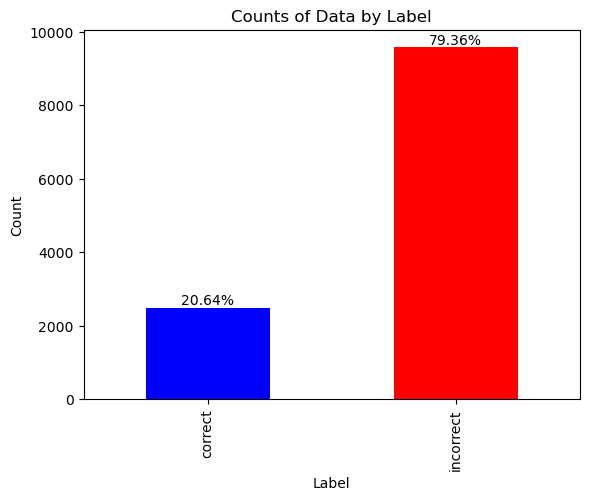

In [26]:
plot_bar_graph(synth_bal_df)

As we can see now, even though the dataset is still imbalanced, it is consider slighlty imbalanced. We will continue working on this problem when we are able to understand the error, but first we need to understant the problem for this project with the lengths of the videos and how we can solve it.



#### Alligning sequences

In our dataset, we have multiple subjects performing movements at different velocities, in our dataframe we can appreciate it with the number of the rows or frames. To accurately compare and evaluate the correctness of these movements, we need to align the frames between subjects. This alignment is crucial for calculating error metrics such as **Mean Joint Percentage Error (MJPE)** and **Mean Angle Percentage Error (MAPE)**. Our strategy focuses on preprocessing the data, detecting sequences, and aligning them to ensure consistent frame comparisons.

We detect the sequences by identifying the moments when a subject performs a squat. By analyzing the angles, we locate the frames with the lowest angles for the connections between the hip, knee, and ankle. These frames represent the lowest points of each squat sequence.

To align the sequences, we determine the highest angle before and after the lowest angle frame for each sequence. These points mark the start and end frames of the sequence. However, since sequences may vary in length due to different subject velocities, we standardize the sequence length to ensure fair comparisons.

To achieve consistent sequence lengths, we extract a fixed number of rows for each half sequence. By using the function **linspace**, we calculate the jump size, which determines the frames to be extracted. This approach guarantees that each half sequence will have the same length, regardless of the original number of frames.

We repeat this alignment process for all subjects, including trainers and trainees. For the training dataset, we aim to obtain five aligned sequences per subject, with each sequence comprising 32 frames (16 frames per half sequence).

With the aligned sequences, we can now calculate the MJPE and MAPE by matching frames on a 1-to-1 basis between the trainer and each trainee at corresponding moments. These error metrics provide quantitative measures of the correctness of movements, allowing us to assess the accuracy of trainees compared to the trainer and to define different level of correctness of a movement based on the error.

The **sequence_extractor** function is designed to extract sequences from a DataFrame column that using the angles formed between the LHip_LKnee_LAnkle that represents the movement of the squats. It identifies local minima and maxima in the angle data and returns the indices of the first local maxima before each sequence, the indices of the smallest local minima for each sequence, and the indices of the first local maxima after each sequence. This function is useful for detecting patterns or sequences in angle data, such as squats or other repetitive leg movements. It provides valuable insights into the timing and characteristics of the identified sequences based on angle fluctuations.

In [27]:
def sequence_extractor(df):
    """
    Extracts sequences from a DataFrame

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.

    Returns:
            - local_maxima_before_indices: Indices of the first local maxima before each sequence.
            - smallest_minima_indices: Indices of the smallest local minima for each sequence.
            - local_maxima_indices: Indices of the first local maxima after each sequence.
    """
    # Extract the values from the DataFrame column
    data = df['LHip_LKnee_LAnkle'].values

    # Find local minima
    local_minima_indices = argrelextrema(data, np.less)[0]
    local_minima_values = data[local_minima_indices]

    # Find local maxima
    local_maxima_indices = argrelextrema(data, np.greater)[0]
    local_maxima_values = data[local_maxima_indices]

    # Create a DataFrame with the local minima and maxima
    df_minima = pd.DataFrame({'Index': local_minima_indices, 'Value': local_minima_values})
    df_maxima = pd.DataFrame({'Index': local_maxima_indices, 'Value': local_maxima_values})

    # Get the five smallest local minima indices
    smallest_indices = np.argpartition(local_minima_values, 5)[:5]
    smallest_minima_indices = local_minima_indices[smallest_indices]
    smallest_minima_values = data[smallest_minima_indices]

    # Find the first local maxima after each of the five local minima
    local_maxima_indices = []
    local_maxima_new_values = []
    local_maxima_before_indices = []
    local_maxima_before_values = []

    for minima_index in smallest_minima_indices:
        temporal_data = data[:minima_index]
        local_maxima_index = argrelextrema(temporal_data, np.greater)[0]
        if len(local_maxima_index) > 0:
            new_index = local_maxima_index[-1]
            if (data[new_index] - data[minima_index]) < 10:
                new_index = local_maxima_index[-2]
            local_maxima_before_values.append(data[new_index])
            local_maxima_before_indices.append(new_index)

        temporal_data = data[minima_index:]
        local_maxima_index = argrelextrema(temporal_data, np.greater)[0]
        new_index = local_maxima_index[0] + minima_index
        local_maxima_new_values.append(data[new_index])
        local_maxima_indices.append(new_index)
    
    return local_maxima_before_indices, smallest_minima_indices, local_maxima_indices

The **alignment_sequence** function aligns and extracts sequences from a DataFrame based on provided indices. It divides the sequences into first and second parts and equally spaced elements are obtained from each part. Aligned rows from both parts are combined into a new DataFrame. The function returns the concatenated DataFrame of aligned sequences that now allow us to create a final dataframe where we can compare the frames 1 to 1 beween trainer and trainees.

In [28]:
def alignment_sequence(df, sorted_indexes, local_maxima_before_indices, smallest_minima_indices, local_maxima_indices):
    """
    Aligns and extracts sequences from a DataFrame based on provided indices.

    Args:
        df (pd.DataFrame): The input DataFrame containing angle data.
        sorted_indexes (list): The sorted indices of the sequences.
        local_maxima_before_indices (list): The indices of the first local maxima before each sequence.
        smallest_minima_indices (list): The indices of the smallest local minima for each sequence.
        local_maxima_indices (list): The indices of the first local maxima after each sequence.

    Returns:
        pd.DataFrame: The aligned and extracted sequences as a DataFrame.

    """
    sequences_df = []
    for index in sorted_indexes:
        test_first_part_df = df.iloc[local_maxima_before_indices[index]:smallest_minima_indices[index]+1].copy()
        test_second_part_df = df.iloc[smallest_minima_indices[index]+1:local_maxima_indices[index]].copy()
        test_first_part_df['Sequence'] = index + 1
        test_first_part_df['Part'] = "first"
        test_second_part_df['Sequence'] = index + 1
        test_second_part_df['Part'] = "second"

        test_first_list_angles = test_first_part_df["LHip_LKnee_LAnkle"].values
        test_second_list_angles = test_second_part_df["LHip_LKnee_LAnkle"].values

        sublist_first = get_equally_spaced_elements(test_first_list_angles, 16)
        sublist_second = get_equally_spaced_elements(test_second_list_angles, 16)

        test_first_part_df.iloc[sublist_first]
        test_second_part_df.iloc[sublist_second]

        test_aligned_df = pd.concat([test_first_part_df.iloc[sublist_first], test_second_part_df.iloc[sublist_second]])

        sequences_df.append(test_aligned_df)
    df_final = pd.concat(sequences_df)
    return df_final

In [29]:
def get_sorted_indices(lst):
    """
    Returns the sorted indices of a given list.

    Parameters:
        lst (list): The list for which to obtain the sorted indices.

    Returns:
        sorted_indices (numpy.ndarray): The sorted indices of the list.
    """
    sorted_indices = np.argsort(lst)
    return sorted_indices

In [30]:
def get_equally_spaced_elements(lst, num_elements):
    """
    Returns the indices of equally spaced elements from a given list.

    Parameters:
        lst (list): The list from which to obtain the indices.
        num_elements (int): The desired number of equally spaced elements.

    Returns:
        indices (numpy.ndarray): The indices of equally spaced elements.
    """
    idx = np.round(np.linspace(0, len(lst) - 1, num_elements)).astype(int)
    return idx


We are going to execute the functions for each subject and obtain the aligned dataframes the ones are going to be used to feed our models after we calculate the errors.

In [31]:
# the subjects are going to be extracted, we are going to iterate over them
aligned_dfs = []
subjects = synth_bal_df['Subject'].unique()

for subject in subjects:
    # the subjects are going to be located in the dataframe and the sequence indices for that subject
    sub_df = synth_bal_df.loc[synth_bal_df['Subject'] == subject]
    local_maxima_before_indices_syn, smallest_minima_indices_syn, local_maxima_indices_syn = sequence_extractor(sub_df)
    # we sort the indices
    sorted_indexes_syn = get_sorted_indices(local_maxima_before_indices_syn)
    # the aligned data is extracted
    syn_df_aligned = alignment_sequence(sub_df, sorted_indexes_syn, local_maxima_before_indices_syn, smallest_minima_indices_syn, local_maxima_indices_syn)
    # the data is added to the final list
    aligned_dfs.append(syn_df_aligned)

df_final = pd.concat(aligned_dfs)


We can now visualise the data to check the new structure of the dataframe

In [32]:
df_final

,Correctness,Subject,Hip_x,Hip_y,Hip_z,LHip_x,LHip_y,LHip_z,LKnee_x,LKnee_y,LKnee_z,LAnkle_x,LAnkle_y,LAnkle_z,RHip_x,RHip_y,RHip_z,RKnee_x,RKnee_y,RKnee_z,RAnkle_x,RAnkle_y,RAnkle_z,Spine_x,Spine_y,Spine_z,Neck_x,Neck_y,Neck_z,Head_x,Head_y,Head_z,HeadTop_x,HeadTop_y,HeadTop_z,LShoulder_x,LShoulder_y,LShoulder_z,LElbow_x,LElbow_y,LElbow_z,LWrist_x,LWrist_y,LWrist_z,RShoulder_x,RShoulder_y,RShoulder_z,RElbow_x,RElbow_y,RElbow_z,RWrist_x,RWrist_y,RWrist_z,LToe_x,LToe_y,LToe_z,TipLToe_x,TipLToe_y,TipLToe_z,RToe_x,RToe_y,RToe_z,TipRToe_x,TipRToe_y,TipRToe_z,LThumb_x,LThumb_y,LThumb_z,TipLHand_x,TipLHand_y,TipLHand_z,RThumb_x,RThumb_y,RThumb_z,TipRHand_x,TipRHand_y,TipRHand_z,Hip_LHip_LKnee,LHip_LKnee_LAnkle,LKnee_LAnkle_LToe,LKnee_LAnkle_TLFoot,Hip_RHip_RKnee,RHip_RKnee_RAnkle,RKnee_RAnkle_RToe,RKnee_RAnkle_TRFoot,LHip_Hip_Spine,RHip_Hip_Spine,Hip_Spine_Neck,Spine_Neck_Head,Neck_Head_HTop,Neck_LShoulder_LElbow,LShoulder_LElbow_LWrist,LElbow_LWrist_LThumb,LElbow_LWrist_TLHand,Neck_RShoulder_RElbow,RShoulder_RElbow_RWrist,RElbow_RWrist_RThumb,RElbow_RWrist_TRHand,Spine_Neck_LShoulder,Spine_Neck_RShoulder,LShoulder_Neck_Head,RShoulder_Neck_Head,Sequence,Part
350,incorrect,s05,-0.158593,0.150440,0.987652,-0.161762,0.285970,0.973917,-0.214149,0.298231,0.518989,-0.266418,0.310506,0.062930,-0.155870,0.014717,0.999447,-0.201940,-0.018622,0.544892,-0.266737,-0.053825,0.091643,-0.129280,0.152238,1.223220,-0.117126,0.157871,1.473800,-0.033718,0.158850,1.560090,-0.089029,0.165501,1.660700,-0.163967,0.283950,1.442410,-0.236414,0.477646,1.259200,-0.142172,0.456684,1.493610,-0.156785,0.029293,1.442650,-0.248567,-0.175701,1.281750,-0.133096,-0.131713,1.503120,-0.108993,0.353927,0.040464,-0.036952,0.374615,0.037809,-0.116634,-0.109342,0.052151,-0.047473,-0.136975,0.043312,-0.117421,0.360125,1.485620,-0.232365,0.430712,1.528110,-0.101930,-0.044249,1.465980,-0.252409,-0.073796,1.539400,97.433912,179.969162,91.930811,90.129848,89.116826,177.647283,97.689150,95.545684,95.472227,85.364311,175.600876,138.747008,107.170502,151.598103,39.771520,95.622368,90.297436,156.557990,37.950010,88.247063,84.735900,77.121316,74.928603,113.058004,111.673278,5,first
355,incorrect,s05,-0.162997,0.150301,0.988584,-0.167643,0.285845,0.975407,-0.214110,0.297991,0.519833,-0.265935,0.310376,0.063726,-0.158791,0.014569,0.999819,-0.201761,-0.018582,0.544947,-0.266677,-0.054069,0.091737,-0.133204,0.150143,1.224100,-0.118430,0.153856,1.474580,-0.035068,0.155133,1.560910,-0.090937,0.161738,1.661200,-0.165248,0.280429,1.445200,-0.237473,0.478807,1.266980,-0.140130,0.453494,1.499690,-0.157944,0.025313,1.443100,-0.249976,-0.179836,1.282540,-0.132423,-0.135334,1.502700,-0.108671,0.354000,0.040541,-0.036659,0.374783,0.037815,-0.116532,-0.109376,0.052111,-0.047353,-0.136898,0.043069,-0.116031,0.356928,1.489970,-0.229784,0.427512,1.535560,-0.100717,-0.047560,1.466780,-0.251375,-0.077186,1.539790,97.238681,179.341138,92.244900,90.382073,89.273469,177.238399,97.724661,95.615181,95.789834,85.047094,176.064985,139.380173,106.887396,152.110345,40.164917,95.723529,90.627869,156.753060,37.863894,89.378685,84.683727,77.365796,75.041432,112.254176,111.874575,5,first
360,incorrect,s05,-0.169160,0.148634,0.989643,-0.175345,0.284144,0.976756,-0.215304,0.296915,0.520583,-0.265392,0.309757,0.064295,-0.163420,0.012934,1.000590,-0.200240,-0.019513,0.545128,-0.266403,-0.054841,0.092085,-0.136675,0.146810,1.224790,-0.119073,0.149050,1.475110,-0.035988,0.149253,1.561710,-0.092098,0.155511,1.661900,-0.165322,0.276331,1.447980,-0.237728,0.478144,1.273730,-0.137415,0.450379,1.504890,-0.159104,0.020647,1.443710,-0.251579,-0.184999,1.284050,-0.133788,-0.138854,1.503740,-0.108369,0.354015,0.040681,-0.036431,0.375074,0.038161,-0.116168,-0.109576,0.052008,-0.046927,-0.136897,0.042831,-0.114242,0.353738,1.493780,-0.226937,0.424724,1.541320,-0.101379,-0.051089,1.468430,-0.252494,-0.080139,1.540730,97.230521,178.742165,92.633480,90.674494,89.271018,176.306396,97.706167,95.580370,96.173263,84.663996,176.040777,140.

#### Calculating errors

To assess the accuracy of movements, we employ error metrics such as **Mean Joint Percentage Error (MJPE)** and **Mean Angle Percentage Error (MAPE)**. These metrics allow us to calculate the discrepancies between the trainer's movements and those of each trainee on a frame-by-frame basis. By comparing the errors, we can categorize each frame as correct, nearly correct, or incorrect based on predefined thresholds. This classification provides insights into the accuracy of trainees' movements in relation to the trainer's, enabling us to evaluate their performance and identify areas for improvement.

In [33]:
landmarks = ['Hip_x','Hip_y','Hip_z','LHip_x','LHip_y','LHip_z','LKnee_x','LKnee_y','LKnee_z','LAnkle_x','LAnkle_y','LAnkle_z',\
              'RHip_x','RHip_y','RHip_z','RKnee_x','RKnee_y','RKnee_z','RAnkle_x','RAnkle_y','RAnkle_z',\
              'Spine_x','Spine_y','Spine_z','Neck_x','Neck_y','Neck_z','Head_x','Head_y','Head_z',\
              'HeadTop_x','HeadTop_y','HeadTop_z','LShoulder_x','LShoulder_y','LShoulder_z','LElbow_x','LElbow_y','LElbow_z',\
              'LWrist_x','LWrist_y','LWrist_z','RShoulder_x','RShoulder_y','RShoulder_z','RElbow_x','RElbow_y','RElbow_z',\
              'RWrist_x','RWrist_y','RWrist_z','LToe_x','LToe_y','LToe_z','TipLToe_x','TipLToe_y','TipLToe_z',\
              'RToe_x','RToe_y','RToe_z','TipRToe_x','TipRToe_y','TipRToe_z','LThumb_x','LThumb_y','LThumb_z',\
              'TipLHand_x','TipLHand_y','TipLHand_z','RThumb_x','RThumb_y','RThumb_z','TipRHand_x','TipRHand_y','TipRHand_z']

In [34]:
angles = ['Hip_LHip_LKnee', 'LHip_LKnee_LAnkle', 'LKnee_LAnkle_LToe', 'LKnee_LAnkle_TLFoot', 'Hip_RHip_RKnee', 'RHip_RKnee_RAnkle',\
              'RKnee_RAnkle_RToe', 'RKnee_RAnkle_TRFoot', 'LHip_Hip_Spine', 'RHip_Hip_Spine', 'Hip_Spine_Neck', 'Spine_Neck_Head', 'Neck_Head_HTop', 'Neck_LShoulder_LElbow',\
              'LShoulder_LElbow_LWrist', 'LElbow_LWrist_LThumb', 'LElbow_LWrist_TLHand', 'Neck_RShoulder_RElbow',\
              'RShoulder_RElbow_RWrist', 'RElbow_RWrist_RThumb', 'RElbow_RWrist_TRHand', 'Spine_Neck_LShoulder','Spine_Neck_RShoulder',\
              'LShoulder_Neck_Head', 'RShoulder_Neck_Head']

In [35]:
def calculate_errors(df, trainer_subject='s08'):
    """
    Calculates the errors between trainee and trainer coordinates and angles for each frame in the given DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame containing the data.
        trainer_subject (str): The subject identifier of the trainer. Defaults to 's08'.

    Returns:
        pd.DataFrame: A DataFrame containing the calculated errors for each frame, including coordinate errors,
                      angle errors, trainee angle, subject, sequence, and part.

    """
        
    trainee_subjects = df['Subject'].unique()

    errors_df = []
    
    for trainee_subject in trainee_subjects:
        trainee_sequences = df[df['Subject'] == trainee_subject]['Sequence'].unique()
        
        for sequence in trainee_sequences:
            first_part_frames = df[(df['Subject'] == trainee_subject) & (df['Sequence'] == sequence) & (df['Part'] == 'first')]
            second_part_frames = df[(df['Subject'] == trainee_subject) & (df['Sequence'] == sequence) & (df['Part'] == 'second')]
            
            trainer_first_part_frames = df[(df['Subject'] == trainer_subject) & (df['Sequence'] == sequence) & (df['Part'] == 'first')]
            trainer_second_part_frames = df[(df['Subject'] == trainer_subject) & (df['Sequence'] == sequence) & (df['Part'] == 'second')]
            
            for i in range(len(first_part_frames)):
                frame_errors = {}
                
                trainee_coords = first_part_frames.iloc[i][landmarks]
                trainer_coords = trainer_first_part_frames.iloc[i][landmarks]
                
                coord_errors = np.abs(trainee_coords - trainer_coords)
                frame_errors['coord_errors'] = np.mean(coord_errors.tolist(), axis=0)
                
                trainee_angles = first_part_frames.iloc[i][angles]
                trainer_angles = trainer_first_part_frames.iloc[i][angles]
                
                angle_errors = np.abs(trainee_angles - trainer_angles)
                
                trainee_angle_first = first_part_frames.iloc[i]["LHip_LKnee_LAnkle"]
                
                frame_errors['angle_errors'] = np.mean(angle_errors.tolist(), axis=0)
                frame_errors['trainee_angle'] = trainee_angle_first
                frame_errors['subject'] = trainee_subject
                frame_errors['sequence'] = sequence
                frame_errors['part'] = 'first'
                
                errors_df.append(frame_errors)
                
            for i in range(len(second_part_frames)):
                frame_errors = {}
                
                trainee_coords = second_part_frames.iloc[i][landmarks]
                trainer_coords = trainer_second_part_frames.iloc[i][landmarks]
                
                coord_errors = np.abs(trainee_coords - trainer_coords)
                frame_errors['coord_errors'] = np.mean(coord_errors.tolist(), axis=0)
                
                trainee_angles = second_part_frames.iloc[i][angles]
                trainer_angles = trainer_second_part_frames.iloc[i][angles]
                
                angle_errors = np.abs(trainee_angles - trainer_angles)
                
                trainee_angle_second = second_part_frames.iloc[i]["LHip_LKnee_LAnkle"]
                
                frame_errors['angle_errors'] = np.mean(angle_errors.tolist(), axis=0)
                frame_errors['trainee_angle'] = trainee_angle_second
                frame_errors['subject'] = trainee_subject
                frame_errors['sequence'] = sequence
                frame_errors['part'] = 'second'
                
                errors_df.append(frame_errors)
    
    errors_df = pd.DataFrame(errors_df)
    
    return errors_df


In [36]:
df_error = calculate_errors(df_final)

We can realise that we have calculated the erros now for all the different frames 1 to 1, it will allows us to determine the correctness for each frame. But first of all we are going to merge the errors dataframe with the final dataframe to have all columns. For that reason we are going to find a value that is unique in our dataframes that we can use as a key. We realised that the column LHip_LKnee_LAnkle is unique in both dataframes, therefore it is going to be used with the Subject as key for the merge.

In [37]:
df_final_errors = pd.merge(df_final,df_error,left_on=['LHip_LKnee_LAnkle','Subject'],right_on=['trainee_angle','subject'], how='left')
df_final_errors = df_final_errors.iloc[:,:-4]

In [38]:
df_final_errors

,Correctness,Subject,Hip_x,Hip_y,Hip_z,LHip_x,LHip_y,LHip_z,LKnee_x,LKnee_y,LKnee_z,LAnkle_x,LAnkle_y,LAnkle_z,RHip_x,RHip_y,RHip_z,RKnee_x,RKnee_y,RKnee_z,RAnkle_x,RAnkle_y,RAnkle_z,Spine_x,Spine_y,Spine_z,Neck_x,Neck_y,Neck_z,Head_x,Head_y,Head_z,HeadTop_x,HeadTop_y,HeadTop_z,LShoulder_x,LShoulder_y,LShoulder_z,LElbow_x,LElbow_y,LElbow_z,LWrist_x,LWrist_y,LWrist_z,RShoulder_x,RShoulder_y,RShoulder_z,RElbow_x,RElbow_y,RElbow_z,RWrist_x,RWrist_y,RWrist_z,LToe_x,LToe_y,LToe_z,TipLToe_x,TipLToe_y,TipLToe_z,RToe_x,RToe_y,RToe_z,TipRToe_x,TipRToe_y,TipRToe_z,LThumb_x,LThumb_y,LThumb_z,TipLHand_x,TipLHand_y,TipLHand_z,RThumb_x,RThumb_y,RThumb_z,TipRHand_x,TipRHand_y,TipRHand_z,Hip_LHip_LKnee,LHip_LKnee_LAnkle,LKnee_LAnkle_LToe,LKnee_LAnkle_TLFoot,Hip_RHip_RKnee,RHip_RKnee_RAnkle,RKnee_RAnkle_RToe,RKnee_RAnkle_TRFoot,LHip_Hip_Spine,RHip_Hip_Spine,Hip_Spine_Neck,Spine_Neck_Head,Neck_Head_HTop,Neck_LShoulder_LElbow,LShoulder_LElbow_LWrist,LElbow_LWrist_LThumb,LElbow_LWrist_TLHand,Neck_RShoulder_RElbow,RShoulder_RElbow_RWrist,RElbow_RWrist_RThumb,RElbow_RWrist_TRHand,Spine_Neck_LShoulder,Spine_Neck_RShoulder,LShoulder_Neck_Head,RShoulder_Neck_Head,Sequence,Part,coord_errors,angle_errors
0,incorrect,s05,-0.158593,0.150440,0.987652,-0.161762,0.285970,0.973917,-0.214149,0.298231,0.518989,-0.266418,0.310506,0.062930,-0.155870,0.014717,0.999447,-0.201940,-0.018622,0.544892,-0.266737,-0.053825,0.091643,-0.129280,0.152238,1.223220,-0.117126,0.157871,1.473800,-0.033718,0.158850,1.560090,-0.089029,0.165501,1.660700,-0.163967,0.283950,1.442410,-0.236414,0.477646,1.259200,-0.142172,0.456684,1.493610,-0.156785,0.029293,1.442650,-0.248567,-0.175701,1.281750,-0.133096,-0.131713,1.503120,-0.108993,0.353927,0.040464,-0.036952,0.374615,0.037809,-0.116634,-0.109342,0.052151,-0.047473,-0.136975,0.043312,-0.117421,0.360125,1.485620,-0.232365,0.430712,1.528110,-0.101930,-0.044249,1.465980,-0.252409,-0.073796,1.539400,97.433912,179.969162,91.930811,90.129848,89.116826,177.647283,97.689150,95.545684,95.472227,85.364311,175.600876,138.747008,107.170502,151.598103,39.771520,95.622368,90.297436,156.557990,37.950010,88.247063,84.735900,77.121316,74.928603,113.058004,111.673278,5,first,0.122353,16.883871
1,incorrect,s05,-0.162997,0.150301,0.988584,-0.167643,0.285845,0.975407,-0.214110,0.297991,0.519833,-0.265935,0.310376,0.063726,-0.158791,0.014569,0.999819,-0.201761,-0.018582,0.544947,-0.266677,-0.054069,0.091737,-0.133204,0.150143,1.224100,-0.118430,0.153856,1.474580,-0.035068,0.155133,1.560910,-0.090937,0.161738,1.661200,-0.165248,0.280429,1.445200,-0.237473,0.478807,1.266980,-0.140130,0.453494,1.499690,-0.157944,0.025313,1.443100,-0.249976,-0.179836,1.282540,-0.132423,-0.135334,1.502700,-0.108671,0.354000,0.040541,-0.036659,0.374783,0.037815,-0.116532,-0.109376,0.052111,-0.047353,-0.136898,0.043069,-0.116031,0.356928,1.489970,-0.229784,0.427512,1.535560,-0.100717,-0.047560,1.466780,-0.251375,-0.077186,1.539790,97.238681,179.341138,92.244900,90.382073,89.273469,177.238399,97.724661,95.615181,95.789834,85.047094,176.064985,139.380173,106.887396,152.110345,40.164917,95.723529,90.627869,156.753060,37.863894,89.378685,84.683727,77.365796,75.041432,112.254176,111.874575,5,first,0.122290,17.070138
2,incorrect,s05,-0.169160,0.148634,0.989643,-0.175345,0.284144,0.976756,-0.215304,0.296915,0.520583,-0.265392,0.309757,0.064295,-0.163420,0.012934,1.000590,-0.200240,-0.019513,0.545128,-0.266403,-0.054841,0.092085,-0.136675,0.146810,1.224790,-0.119073,0.149050,1.475110,-0.035988,0.149253,1.561710,-0.092098,0.155511,1.661900,-0.165322,0.276331,1.447980,-0.237728,0.478144,1.273730,-0.137415,0.450379,1.504890,-0.159104,0.020647,1.443710,-0.251579,-0.184999,1.284050,-0.133788,-0.138854,1.503740,-0.108369,0.354015,0.040681,-0.036431,0.375074,0.038161,-0.116168,-0.109576,0.052008,-0.046927,-0.136897,0.042831,-0.114242,0.353738,1.493780,-0.226937,0.424724,1.541320,-0.101379,-0.051089,1.468430,-0.252494,-0.080139,1.540730,97.230521,178.742165,92.633480,90.674494,89.271018,176.3063

Now that we have obtained the necessary attributes in our updated dataframe, we can proceed with the classification of each frame based on the errors. By analyzing the errors, we can determine whether a particular frame is classified as correct or incorrect, providing valuable insights into the level of correctness at different moments or executions. To establish meaningful thresholds for classification, we will plot the errors per subject. This visualization will enable us to identify appropriate thresholds for categorizing movements into different groups of correctness, aiding in our understanding and analysis of the data

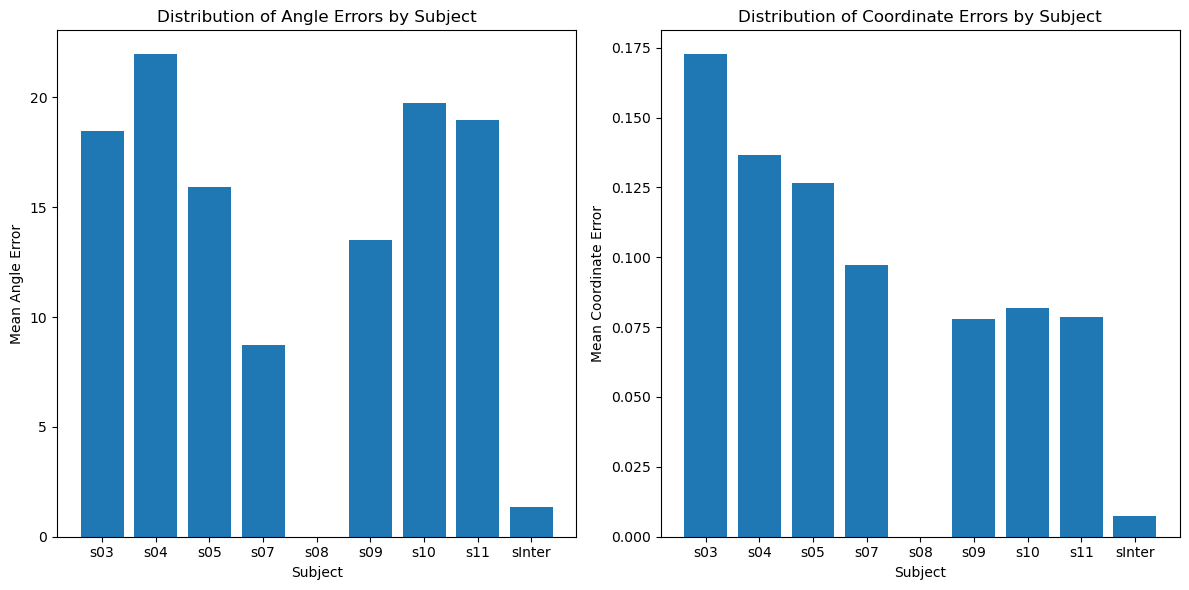

In [39]:
# Group the dataframe by subject and calculate the mean angle error and coordinate error for each subject
mean_angle_errors = df_final_errors.groupby('Subject')['angle_errors'].mean()
mean_coordinate_errors = df_final_errors.groupby('Subject')['coord_errors'].mean()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution of angle errors
ax1.bar(mean_angle_errors.index, mean_angle_errors.values)
ax1.set_xlabel('Subject')
ax1.set_ylabel('Mean Angle Error')
ax1.set_title('Distribution of Angle Errors by Subject')

# Plot the distribution of coordinate errors
ax2.bar(mean_coordinate_errors.index, mean_coordinate_errors.values)
ax2.set_xlabel('Subject')
ax2.set_ylabel('Mean Coordinate Error')
ax2.set_title('Distribution of Coordinate Errors by Subject')

# Adjust the spacing between subplots
plt.tight_layout()



After carefully evaluating the errors and their relevance to our analysis, we have come to the realization that relying solely on the coordinates may not be the most effective approach for determining the correctness of a movement. Upon closer examination, we have observed that the SInter, which represents synthetic data generated from a correct movement, exhibits remarkably low angle errors.Additionally, we have identified Subject S07 as the closest match to the correctness defined by the trainer, suggesting that their movements can also be classified as correct.

As we are lacking data and we can realise that the production of synthethic data is working properly, we are going to generate three more synthetic elements. Observing the graphic we are going to take the s04, s05 and s07 because the difference in the error between them can be easily appreciated. This will help us, at the moment of testing our model.

In [40]:
# Rows with correct label are extracted
df_s04 = df_raw[df_raw["Subject"] == "s04"]
df_s05 = df_raw[df_raw["Subject"] == "s05"]
df_s07 = df_raw[df_raw["Subject"] == "s07"]

# Only columns with the coordinates for the landmarks are extracted
df_s04_coord = df_s04.iloc[:,2:77]
df_s05_coord = df_s05.iloc[:,2:77]
df_s07_coord = df_s07.iloc[:,2:77]

# The data is going to be interpolated
df_s04_syn = interpolate_frames(df_s04_coord, 1)
df_s05_syn = interpolate_frames(df_s05_coord, 1)
df_s07_syn = interpolate_frames(df_s07_coord, 1)

s04_syn_data = []
s04_syn_angles = []
s05_syn_data = []
s05_syn_angles = []
s07_syn_data = []
s07_syn_angles = []

# Synthetic data is processed and created
s04_syn_data, s04_syn_angles = synth_data_process(df_s04_syn,"Incorrect","s04_syn")
s05_syn_data, s05_syn_angles = synth_data_process(df_s05_syn,"Almost correct","s05_syn")
s07_syn_data, s07_syn_angles = synth_data_process(df_s07_syn,"Correct","s07_syn")

In [41]:
# The dataframes are created witht the synthetic data
df_s04_syn_correct = pd.DataFrame(list(s04_syn_data), columns=df_raw.columns)
df_s05_syn_correct = pd.DataFrame(list(s05_syn_data), columns=df_raw.columns)
df_s07_syn_correct = pd.DataFrame(list(s07_syn_data), columns=df_raw.columns)

# The dataframes are concatenated as we did before
df_s04_s08_syn = pd.concat([df_s04_syn_correct, df_minor_class], ignore_index=True)
df_s05_s04_s08_syn = pd.concat([df_s05_syn_correct, df_s04_s08_syn], ignore_index=True)
df_new_syn_final = pd.concat([df_s05_s04_s08_syn, df_s07_syn_correct], ignore_index=True)

# The resulting merged_df will contain all rows from both dataframes, first the raw one followed by the one with synthetic data


In [42]:
df_new_syn_final

,Correctness,Subject,Hip_x,Hip_y,Hip_z,LHip_x,LHip_y,LHip_z,LKnee_x,LKnee_y,LKnee_z,LAnkle_x,LAnkle_y,LAnkle_z,RHip_x,RHip_y,RHip_z,RKnee_x,RKnee_y,RKnee_z,RAnkle_x,RAnkle_y,RAnkle_z,Spine_x,Spine_y,Spine_z,Neck_x,Neck_y,Neck_z,Head_x,Head_y,Head_z,HeadTop_x,HeadTop_y,HeadTop_z,LShoulder_x,LShoulder_y,LShoulder_z,LElbow_x,LElbow_y,LElbow_z,LWrist_x,LWrist_y,LWrist_z,RShoulder_x,RShoulder_y,RShoulder_z,RElbow_x,RElbow_y,RElbow_z,RWrist_x,RWrist_y,RWrist_z,LToe_x,LToe_y,LToe_z,TipLToe_x,TipLToe_y,TipLToe_z,RToe_x,RToe_y,RToe_z,TipRToe_x,TipRToe_y,TipRToe_z,LThumb_x,LThumb_y,LThumb_z,TipLHand_x,TipLHand_y,TipLHand_z,RThumb_x,RThumb_y,RThumb_z,TipRHand_x,TipRHand_y,TipRHand_z,Hip_LHip_LKnee,LHip_LKnee_LAnkle,LKnee_LAnkle_LToe,LKnee_LAnkle_TLFoot,Hip_RHip_RKnee,RHip_RKnee_RAnkle,RKnee_RAnkle_RToe,RKnee_RAnkle_TRFoot,LHip_Hip_Spine,RHip_Hip_Spine,Hip_Spine_Neck,Spine_Neck_Head,Neck_Head_HTop,Neck_LShoulder_LElbow,LShoulder_LElbow_LWrist,LElbow_LWrist_LThumb,LElbow_LWrist_TLHand,Neck_RShoulder_RElbow,RShoulder_RElbow_RWrist,RElbow_RWrist_RThumb,RElbow_RWrist_TRHand,Spine_Neck_LShoulder,Spine_Neck_RShoulder,LShoulder_Neck_Head,RShoulder_Neck_Head
0,Almost correct,s05_syn,-0.165330,0.146325,0.980317,-0.163169,0.281758,0.965467,-0.220548,0.297821,0.511261,-0.269544,0.312880,0.054922,-0.167992,0.010704,0.993241,-0.208095,-0.021329,0.538027,-0.271439,-0.056105,0.084540,-0.169902,0.142535,1.217635,-0.158641,0.160026,1.467715,-0.091632,0.157978,1.567255,-0.162751,0.172471,1.656460,-0.166842,0.280589,1.400835,-0.189150,0.371332,1.140830,-0.122992,0.429276,0.903060,-0.175426,0.033400,1.415180,-0.220552,-0.093223,1.173800,-0.160398,-0.163021,0.937623,-0.110451,0.353359,0.039980,-0.038090,0.373028,0.041404,-0.118392,-0.108616,0.053046,-0.048613,-0.135885,0.049548,-0.035341,0.388026,0.927874,-0.084031,0.459787,0.816162,-0.067540,-0.131973,0.957954,-0.117296,-0.212925,0.816966,98.101101,178.921092,89.722260,87.777208,88.685548,177.071744,94.860360,92.361987,97.187874,83.622332,173.863084,148.258921,107.212720,138.347495,159.492570,84.359843,170.547040,140.564756,154.333770,86.873247,172.655721,64.888032,63.357815,116.723411,111.573563
1,Almost correct,s05_syn,-0.164840,0.146363,0.980266,-0.162610,0.281795,0.965425,-0.220367,0.297857,0.511267,-0.269518,0.312895,0.054943,-0.167570,0.010742,0.993180,-0.207723,-0.021297,0.537971,-0.271449,-0.056115,0.084540,-0.169586,0.142811,1.217580,-0.158209,0.160146,1.467670,-0.091185,0.158085,1.567200,-0.162296,0.172610,1.656405,-0.166393,0.280741,1.400845,-0.188903,0.371497,1.140860,-0.122988,0.429528,0.903043,-0.175052,0.033532,1.415125,-0.220369,-0.093043,1.173755,-0.159865,-0.162793,0.937653,-0.110436,0.353405,0.039970,-0.038088,0.373112,0.041548,-0.118406,-0.108627,0.053023,-0.048633,-0.135917,0.049576,-0.035340,0.388081,0.927536,-0.084206,0.460168,0.816111,-0.066944,-0.132131,0.958280,-0.116637,-0.212639,0.817017,98.091885,178.892661,89.714443,87.729788,88.692960,177.029464,94.824687,92.312777,97.127337,83.682681,173.895666,148.281120,107.205908,138.325001,159.510397,84.447827,170.561980,140.565242,154.225755,86.864536,172.683656,64.877509,63.384773,116.702511,111.584753
2,Almost correct,s05_syn,-0.164188,0.146420,0.980185,-0.161951,0.281855,0.965364,-0.220142,0.297911,0.511260,-0.269498,0.312924,0.054958,-0.166927,0.010798,0.993080,-0.207354,-0.021260,0.537896,-0.271464,-0.056118,0.084523,-0.169293,0.143239,1.217495,-0.157662,0.160274,1.467595,-0.090642,0.158204,1.567130,-0.161729,0.172758,1.656345,-0.165795,0.280909,1.400835,-0.188528,0.371750,1.140895,-0.123056,0.429905,0.902990,-0.174594,0.033679,1.415035,-0.220051,-0.092850,1.173670,-0.159299,-0.162585,0.937626,-0.110413,0.353420,0.039963,-0.038064,0.373120,0.041527,-0.118422,-0.108627,0.053005,-0.048648,-0.135912,0.049522,-0.035298,0.388539,0.927226,-0.084522,0.460684,0.815997,-0.066467,-0.131937,0.958665,-0.115571,-0.212313,0.817123,98.081018,178.863556,89.695893,87.712225,88.704588,177.015131,94.780254,92.277073,97.030967,83.778454,173.928136,148.3

Once the test dataset is obtained with the new synthetics data, we are going to extract again the sequences and allign the videos

In [43]:
# the subjects are going to be extracted, we are going to iterate over them
aligned_test_dfs = []
subjects = df_new_syn_final['Subject'].unique()

for subject in subjects:
    # the subjects are going to be located in the dataframe and the sequence indices for that subject
    sub_df = df_new_syn_final.loc[df_new_syn_final['Subject'] == subject]
    local_maxima_before_indices, smallest_minima_indices, local_maxima_indices = sequence_extractor(sub_df)
    # we sort the indices
    sorted_indexes = get_sorted_indices(local_maxima_before_indices)
    # the aligned data is extracted
    df_aligned = alignment_sequence(sub_df, sorted_indexes, local_maxima_before_indices, smallest_minima_indices, local_maxima_indices)
    # the data is added to the final list
    aligned_test_dfs.append(df_aligned)

df_final_syn = pd.concat(aligned_test_dfs)


With the new data aligned we are going to calculate the errors. For that reason we need to add temporaly the subject number 8 to our new dataset with synthetic data, as it is the reference to analyse correctness

In [44]:
angles = ['Hip_LHip_LKnee', 'LHip_LKnee_LAnkle', 'LKnee_LAnkle_LToe', 'LKnee_LAnkle_TLFoot', 'Hip_RHip_RKnee', 'RHip_RKnee_RAnkle',\
              'RKnee_RAnkle_RToe', 'RKnee_RAnkle_TRFoot', 'LHip_Hip_Spine', 'RHip_Hip_Spine', 'Hip_Spine_Neck', 'Spine_Neck_Head', 'Neck_Head_HTop', 'Neck_LShoulder_LElbow',\
              'LShoulder_LElbow_LWrist', 'LElbow_LWrist_LThumb', 'LElbow_LWrist_TLHand', 'Neck_RShoulder_RElbow',\
              'RShoulder_RElbow_RWrist', 'RElbow_RWrist_RThumb', 'RElbow_RWrist_TRHand', 'Spine_Neck_LShoulder','Spine_Neck_RShoulder',\
              'LShoulder_Neck_Head', 'RShoulder_Neck_Head']

In [45]:
df_new_syn_error = calculate_errors(df_final_syn)

In [46]:
df_processed_errors = pd.merge(df_final_syn,df_new_syn_error,left_on=['LHip_LKnee_LAnkle','Subject'],right_on=['trainee_angle','subject'], how='left')
df_processed_errors = df_processed_errors.iloc[:,:-4]
df_processed_errors = df_processed_errors.loc[df_processed_errors['Subject'] != "s08"]
df_final_errors = pd.concat([df_final_errors, df_processed_errors], ignore_index=True)


In [47]:
df_final_errors

,Correctness,Subject,Hip_x,Hip_y,Hip_z,LHip_x,LHip_y,LHip_z,LKnee_x,LKnee_y,LKnee_z,LAnkle_x,LAnkle_y,LAnkle_z,RHip_x,RHip_y,RHip_z,RKnee_x,RKnee_y,RKnee_z,RAnkle_x,RAnkle_y,RAnkle_z,Spine_x,Spine_y,Spine_z,Neck_x,Neck_y,Neck_z,Head_x,Head_y,Head_z,HeadTop_x,HeadTop_y,HeadTop_z,LShoulder_x,LShoulder_y,LShoulder_z,LElbow_x,LElbow_y,LElbow_z,LWrist_x,LWrist_y,LWrist_z,RShoulder_x,RShoulder_y,RShoulder_z,RElbow_x,RElbow_y,RElbow_z,RWrist_x,RWrist_y,RWrist_z,LToe_x,LToe_y,LToe_z,TipLToe_x,TipLToe_y,TipLToe_z,RToe_x,RToe_y,RToe_z,TipRToe_x,TipRToe_y,TipRToe_z,LThumb_x,LThumb_y,LThumb_z,TipLHand_x,TipLHand_y,TipLHand_z,RThumb_x,RThumb_y,RThumb_z,TipRHand_x,TipRHand_y,TipRHand_z,Hip_LHip_LKnee,LHip_LKnee_LAnkle,LKnee_LAnkle_LToe,LKnee_LAnkle_TLFoot,Hip_RHip_RKnee,RHip_RKnee_RAnkle,RKnee_RAnkle_RToe,RKnee_RAnkle_TRFoot,LHip_Hip_Spine,RHip_Hip_Spine,Hip_Spine_Neck,Spine_Neck_Head,Neck_Head_HTop,Neck_LShoulder_LElbow,LShoulder_LElbow_LWrist,LElbow_LWrist_LThumb,LElbow_LWrist_TLHand,Neck_RShoulder_RElbow,RShoulder_RElbow_RWrist,RElbow_RWrist_RThumb,RElbow_RWrist_TRHand,Spine_Neck_LShoulder,Spine_Neck_RShoulder,LShoulder_Neck_Head,RShoulder_Neck_Head,Sequence,Part,coord_errors,angle_errors
0,incorrect,s05,-0.158593,0.150440,0.987652,-0.161762,0.285970,0.973917,-0.214149,0.298231,0.518989,-0.266418,0.310506,0.062930,-0.155870,0.014717,0.999447,-0.201940,-0.018622,0.544892,-0.266737,-0.053825,0.091643,-0.129280,0.152238,1.223220,-0.117126,0.157871,1.473800,-0.033718,0.158850,1.560090,-0.089029,0.165501,1.660700,-0.163967,0.283950,1.442410,-0.236414,0.477646,1.25920,-0.142172,0.456684,1.493610,-0.156785,0.029293,1.442650,-0.248567,-0.175701,1.281750,-0.133096,-0.131713,1.503120,-0.108993,0.353927,0.040464,-0.036952,0.374615,0.037809,-0.116634,-0.109342,0.052151,-0.047473,-0.136975,0.043312,-0.117421,0.360125,1.485620,-0.232365,0.430712,1.528110,-0.101930,-0.044249,1.465980,-0.252409,-0.073796,1.53940,97.433912,179.969162,91.930811,90.129848,89.116826,177.647283,97.689150,95.545684,95.472227,85.364311,175.600876,138.747008,107.170502,151.598103,39.771520,95.622368,90.297436,156.557990,37.950010,88.247063,84.735900,77.121316,74.928603,113.058004,111.673278,5,first,0.122353,16.883871
1,incorrect,s05,-0.162997,0.150301,0.988584,-0.167643,0.285845,0.975407,-0.214110,0.297991,0.519833,-0.265935,0.310376,0.063726,-0.158791,0.014569,0.999819,-0.201761,-0.018582,0.544947,-0.266677,-0.054069,0.091737,-0.133204,0.150143,1.224100,-0.118430,0.153856,1.474580,-0.035068,0.155133,1.560910,-0.090937,0.161738,1.661200,-0.165248,0.280429,1.445200,-0.237473,0.478807,1.26698,-0.140130,0.453494,1.499690,-0.157944,0.025313,1.443100,-0.249976,-0.179836,1.282540,-0.132423,-0.135334,1.502700,-0.108671,0.354000,0.040541,-0.036659,0.374783,0.037815,-0.116532,-0.109376,0.052111,-0.047353,-0.136898,0.043069,-0.116031,0.356928,1.489970,-0.229784,0.427512,1.535560,-0.100717,-0.047560,1.466780,-0.251375,-0.077186,1.53979,97.238681,179.341138,92.244900,90.382073,89.273469,177.238399,97.724661,95.615181,95.789834,85.047094,176.064985,139.380173,106.887396,152.110345,40.164917,95.723529,90.627869,156.753060,37.863894,89.378685,84.683727,77.365796,75.041432,112.254176,111.874575,5,first,0.122290,17.070138
2,incorrect,s05,-0.169160,0.148634,0.989643,-0.175345,0.284144,0.976756,-0.215304,0.296915,0.520583,-0.265392,0.309757,0.064295,-0.163420,0.012934,1.000590,-0.200240,-0.019513,0.545128,-0.266403,-0.054841,0.092085,-0.136675,0.146810,1.224790,-0.119073,0.149050,1.475110,-0.035988,0.149253,1.561710,-0.092098,0.155511,1.661900,-0.165322,0.276331,1.447980,-0.237728,0.478144,1.27373,-0.137415,0.450379,1.504890,-0.159104,0.020647,1.443710,-0.251579,-0.184999,1.284050,-0.133788,-0.138854,1.503740,-0.108369,0.354015,0.040681,-0.036431,0.375074,0.038161,-0.116168,-0.109576,0.052008,-0.046927,-0.136897,0.042831,-0.114242,0.353738,1.493780,-0.226937,0.424724,1.541320,-0.101379,-0.051089,1.468430,-0.252494,-0.080139,1.54073,97.230521,178.742165,92.633480,90.674494,89.271018,176.306396,97.

Now we can see we have added a total of 480 rows more, or 15 sequences to our dataset. This is going to help us at the moemnt of evaluatong the correctness from our model. 

 In light of these findings, we have updated our classification groups as follows:

- Angle error between 0 and 10: Correct
- Angle error between 10 and 20: Almost correct
- Angle error greater than 20: Incorrect

By incorporating angle errors into our classification criteria, we aim to provide a more comprehensive and accurate assessment of movement correctness.

In [48]:
def update_correctness(df):
    """
    Update the correctness label in a DataFrame based on angle error values.

    Args:
        df (pandas.DataFrame): DataFrame containing angle error values.

    Returns:
        pandas.DataFrame: DataFrame with updated correctness labels in the 'Correctness' column.

    """

    # Define the correctness criteria
    conditions = [
        (df['angle_errors'] >= 0) & (df['angle_errors'] < 10),
        (df['angle_errors'] >= 10) & (df['angle_errors'] < 17.5),
        (df['angle_errors'] >= 17.5)
    ]
    choices = ['Correct', 'Almost correct', 'Incorrect']

    # Update the 'Correctness' column based on the criteria
    df['Correctness'] = np.select(conditions, choices, default='Unknown')

    return df


In [49]:
df_final = update_correctness(df_final_errors)

In [50]:

df_final

,Correctness,Subject,Hip_x,Hip_y,Hip_z,LHip_x,LHip_y,LHip_z,LKnee_x,LKnee_y,LKnee_z,LAnkle_x,LAnkle_y,LAnkle_z,RHip_x,RHip_y,RHip_z,RKnee_x,RKnee_y,RKnee_z,RAnkle_x,RAnkle_y,RAnkle_z,Spine_x,Spine_y,Spine_z,Neck_x,Neck_y,Neck_z,Head_x,Head_y,Head_z,HeadTop_x,HeadTop_y,HeadTop_z,LShoulder_x,LShoulder_y,LShoulder_z,LElbow_x,LElbow_y,LElbow_z,LWrist_x,LWrist_y,LWrist_z,RShoulder_x,RShoulder_y,RShoulder_z,RElbow_x,RElbow_y,RElbow_z,RWrist_x,RWrist_y,RWrist_z,LToe_x,LToe_y,LToe_z,TipLToe_x,TipLToe_y,TipLToe_z,RToe_x,RToe_y,RToe_z,TipRToe_x,TipRToe_y,TipRToe_z,LThumb_x,LThumb_y,LThumb_z,TipLHand_x,TipLHand_y,TipLHand_z,RThumb_x,RThumb_y,RThumb_z,TipRHand_x,TipRHand_y,TipRHand_z,Hip_LHip_LKnee,LHip_LKnee_LAnkle,LKnee_LAnkle_LToe,LKnee_LAnkle_TLFoot,Hip_RHip_RKnee,RHip_RKnee_RAnkle,RKnee_RAnkle_RToe,RKnee_RAnkle_TRFoot,LHip_Hip_Spine,RHip_Hip_Spine,Hip_Spine_Neck,Spine_Neck_Head,Neck_Head_HTop,Neck_LShoulder_LElbow,LShoulder_LElbow_LWrist,LElbow_LWrist_LThumb,LElbow_LWrist_TLHand,Neck_RShoulder_RElbow,RShoulder_RElbow_RWrist,RElbow_RWrist_RThumb,RElbow_RWrist_TRHand,Spine_Neck_LShoulder,Spine_Neck_RShoulder,LShoulder_Neck_Head,RShoulder_Neck_Head,Sequence,Part,coord_errors,angle_errors
0,Almost correct,s05,-0.158593,0.150440,0.987652,-0.161762,0.285970,0.973917,-0.214149,0.298231,0.518989,-0.266418,0.310506,0.062930,-0.155870,0.014717,0.999447,-0.201940,-0.018622,0.544892,-0.266737,-0.053825,0.091643,-0.129280,0.152238,1.223220,-0.117126,0.157871,1.473800,-0.033718,0.158850,1.560090,-0.089029,0.165501,1.660700,-0.163967,0.283950,1.442410,-0.236414,0.477646,1.25920,-0.142172,0.456684,1.493610,-0.156785,0.029293,1.442650,-0.248567,-0.175701,1.281750,-0.133096,-0.131713,1.503120,-0.108993,0.353927,0.040464,-0.036952,0.374615,0.037809,-0.116634,-0.109342,0.052151,-0.047473,-0.136975,0.043312,-0.117421,0.360125,1.485620,-0.232365,0.430712,1.528110,-0.101930,-0.044249,1.465980,-0.252409,-0.073796,1.53940,97.433912,179.969162,91.930811,90.129848,89.116826,177.647283,97.689150,95.545684,95.472227,85.364311,175.600876,138.747008,107.170502,151.598103,39.771520,95.622368,90.297436,156.557990,37.950010,88.247063,84.735900,77.121316,74.928603,113.058004,111.673278,5,first,0.122353,16.883871
1,Almost correct,s05,-0.162997,0.150301,0.988584,-0.167643,0.285845,0.975407,-0.214110,0.297991,0.519833,-0.265935,0.310376,0.063726,-0.158791,0.014569,0.999819,-0.201761,-0.018582,0.544947,-0.266677,-0.054069,0.091737,-0.133204,0.150143,1.224100,-0.118430,0.153856,1.474580,-0.035068,0.155133,1.560910,-0.090937,0.161738,1.661200,-0.165248,0.280429,1.445200,-0.237473,0.478807,1.26698,-0.140130,0.453494,1.499690,-0.157944,0.025313,1.443100,-0.249976,-0.179836,1.282540,-0.132423,-0.135334,1.502700,-0.108671,0.354000,0.040541,-0.036659,0.374783,0.037815,-0.116532,-0.109376,0.052111,-0.047353,-0.136898,0.043069,-0.116031,0.356928,1.489970,-0.229784,0.427512,1.535560,-0.100717,-0.047560,1.466780,-0.251375,-0.077186,1.53979,97.238681,179.341138,92.244900,90.382073,89.273469,177.238399,97.724661,95.615181,95.789834,85.047094,176.064985,139.380173,106.887396,152.110345,40.164917,95.723529,90.627869,156.753060,37.863894,89.378685,84.683727,77.365796,75.041432,112.254176,111.874575,5,first,0.122290,17.070138
2,Incorrect,s05,-0.169160,0.148634,0.989643,-0.175345,0.284144,0.976756,-0.215304,0.296915,0.520583,-0.265392,0.309757,0.064295,-0.163420,0.012934,1.000590,-0.200240,-0.019513,0.545128,-0.266403,-0.054841,0.092085,-0.136675,0.146810,1.224790,-0.119073,0.149050,1.475110,-0.035988,0.149253,1.561710,-0.092098,0.155511,1.661900,-0.165322,0.276331,1.447980,-0.237728,0.478144,1.27373,-0.137415,0.450379,1.504890,-0.159104,0.020647,1.443710,-0.251579,-0.184999,1.284050,-0.133788,-0.138854,1.503740,-0.108369,0.354015,0.040681,-0.036431,0.375074,0.038161,-0.116168,-0.109576,0.052008,-0.046927,-0.136897,0.042831,-0.114242,0.353738,1.493780,-0.226937,0.424724,1.541320,-0.101379,-0.051089,1.468430,-0.252494,-0.080139,1.54073,97.230521,178.742165,92.633480,90.674494,89.271018,176.

We will now visualize the distribution of our data through a graph to assess if the error analysis has resulted in a more balanced dataset. The dataset has undergone necessary preprocessing steps to ensure its suitability for algorithmic analysis. Our goal is to examine if the distribution of different correctness groups has improved, indicating a more balanced representation of the data and enhancing the performance of the algorithms.

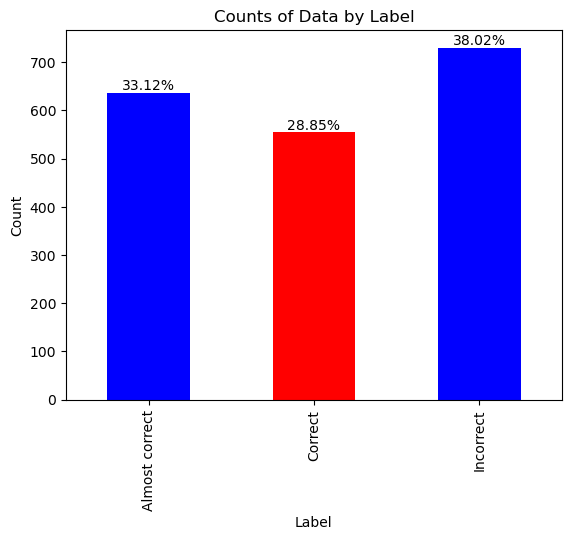

In [51]:
plot_bar_graph(df_final)

#### Processing the data

Before proceeding feeding the models and implementing feature selection, it is important to define the criteria for determining the importance of dimensions. In this case, our objective is to identify the parts of the body that are important for the squat movement. Therefore, we can exclude certain dimensions that are unlikely to provide us with this specific information.

For example, dimensions such as "Subject" or "Errors" may not directly contribute to identifying the joints or body parts involved in the squat. These dimensions are more related to other factors, such as the specific individuals performing the squat or the errors in the movement calculation.

By dropping these dimensions, we can focus on the dimensions that directly represent the angles and coordinates of different movements, which are more likely to capture the information we need to understand the importance of different body parts in the squat.

In [52]:
df_final_all = df_final

In [53]:
df_final_all = df_final_all.drop(['Subject', 'Sequence', 'Part', 'coord_errors', 'angle_errors'], axis=1)

In [54]:
mapping_correctness = {'Almost correct': 1, 'Correct': 2, 'Incorrect': 3}

df_final_all = df_final_all.replace({'Correctness': mapping_correctness})

In [55]:
df_final_all

,Correctness,Hip_x,Hip_y,Hip_z,LHip_x,LHip_y,LHip_z,LKnee_x,LKnee_y,LKnee_z,LAnkle_x,LAnkle_y,LAnkle_z,RHip_x,RHip_y,RHip_z,RKnee_x,RKnee_y,RKnee_z,RAnkle_x,RAnkle_y,RAnkle_z,Spine_x,Spine_y,Spine_z,Neck_x,Neck_y,Neck_z,Head_x,Head_y,Head_z,HeadTop_x,HeadTop_y,HeadTop_z,LShoulder_x,LShoulder_y,LShoulder_z,LElbow_x,LElbow_y,LElbow_z,LWrist_x,LWrist_y,LWrist_z,RShoulder_x,RShoulder_y,RShoulder_z,RElbow_x,RElbow_y,RElbow_z,RWrist_x,RWrist_y,RWrist_z,LToe_x,LToe_y,LToe_z,TipLToe_x,TipLToe_y,TipLToe_z,RToe_x,RToe_y,RToe_z,TipRToe_x,TipRToe_y,TipRToe_z,LThumb_x,LThumb_y,LThumb_z,TipLHand_x,TipLHand_y,TipLHand_z,RThumb_x,RThumb_y,RThumb_z,TipRHand_x,TipRHand_y,TipRHand_z,Hip_LHip_LKnee,LHip_LKnee_LAnkle,LKnee_LAnkle_LToe,LKnee_LAnkle_TLFoot,Hip_RHip_RKnee,RHip_RKnee_RAnkle,RKnee_RAnkle_RToe,RKnee_RAnkle_TRFoot,LHip_Hip_Spine,RHip_Hip_Spine,Hip_Spine_Neck,Spine_Neck_Head,Neck_Head_HTop,Neck_LShoulder_LElbow,LShoulder_LElbow_LWrist,LElbow_LWrist_LThumb,LElbow_LWrist_TLHand,Neck_RShoulder_RElbow,RShoulder_RElbow_RWrist,RElbow_RWrist_RThumb,RElbow_RWrist_TRHand,Spine_Neck_LShoulder,Spine_Neck_RShoulder,LShoulder_Neck_Head,RShoulder_Neck_Head
0,1,-0.158593,0.150440,0.987652,-0.161762,0.285970,0.973917,-0.214149,0.298231,0.518989,-0.266418,0.310506,0.062930,-0.155870,0.014717,0.999447,-0.201940,-0.018622,0.544892,-0.266737,-0.053825,0.091643,-0.129280,0.152238,1.223220,-0.117126,0.157871,1.473800,-0.033718,0.158850,1.560090,-0.089029,0.165501,1.660700,-0.163967,0.283950,1.442410,-0.236414,0.477646,1.25920,-0.142172,0.456684,1.493610,-0.156785,0.029293,1.442650,-0.248567,-0.175701,1.281750,-0.133096,-0.131713,1.503120,-0.108993,0.353927,0.040464,-0.036952,0.374615,0.037809,-0.116634,-0.109342,0.052151,-0.047473,-0.136975,0.043312,-0.117421,0.360125,1.485620,-0.232365,0.430712,1.528110,-0.101930,-0.044249,1.465980,-0.252409,-0.073796,1.53940,97.433912,179.969162,91.930811,90.129848,89.116826,177.647283,97.689150,95.545684,95.472227,85.364311,175.600876,138.747008,107.170502,151.598103,39.771520,95.622368,90.297436,156.557990,37.950010,88.247063,84.735900,77.121316,74.928603,113.058004,111.673278
1,1,-0.162997,0.150301,0.988584,-0.167643,0.285845,0.975407,-0.214110,0.297991,0.519833,-0.265935,0.310376,0.063726,-0.158791,0.014569,0.999819,-0.201761,-0.018582,0.544947,-0.266677,-0.054069,0.091737,-0.133204,0.150143,1.224100,-0.118430,0.153856,1.474580,-0.035068,0.155133,1.560910,-0.090937,0.161738,1.661200,-0.165248,0.280429,1.445200,-0.237473,0.478807,1.26698,-0.140130,0.453494,1.499690,-0.157944,0.025313,1.443100,-0.249976,-0.179836,1.282540,-0.132423,-0.135334,1.502700,-0.108671,0.354000,0.040541,-0.036659,0.374783,0.037815,-0.116532,-0.109376,0.052111,-0.047353,-0.136898,0.043069,-0.116031,0.356928,1.489970,-0.229784,0.427512,1.535560,-0.100717,-0.047560,1.466780,-0.251375,-0.077186,1.53979,97.238681,179.341138,92.244900,90.382073,89.273469,177.238399,97.724661,95.615181,95.789834,85.047094,176.064985,139.380173,106.887396,152.110345,40.164917,95.723529,90.627869,156.753060,37.863894,89.378685,84.683727,77.365796,75.041432,112.254176,111.874575
2,3,-0.169160,0.148634,0.989643,-0.175345,0.284144,0.976756,-0.215304,0.296915,0.520583,-0.265392,0.309757,0.064295,-0.163420,0.012934,1.000590,-0.200240,-0.019513,0.545128,-0.266403,-0.054841,0.092085,-0.136675,0.146810,1.224790,-0.119073,0.149050,1.475110,-0.035988,0.149253,1.561710,-0.092098,0.155511,1.661900,-0.165322,0.276331,1.447980,-0.237728,0.478144,1.27373,-0.137415,0.450379,1.504890,-0.159104,0.020647,1.443710,-0.251579,-0.184999,1.284050,-0.133788,-0.138854,1.503740,-0.108369,0.354015,0.040681,-0.036431,0.375074,0.038161,-0.116168,-0.109576,0.052008,-0.046927,-0.136897,0.042831,-0.114242,0.353738,1.493780,-0.226937,0.424724,1.541320,-0.101379,-0.051089,1.468430,-0.252494,-0.080139,1.54073,97.230521,178.742165,92.633480,90.674494,89.271018,176.306396,97.706167,95.580370,96.173263,84.663996,176.040777,140.207451,106.915966,152.226860,40.643565,95.522265,90.346366,156.981307,37.646799,90.248

The data is going to be splitted into train and test and prepared to be used to train the model

In [56]:
df_all_cols = df_final_all[landmarks + angles].values
y_all = df_final_all['Correctness'].values

In [57]:
# Normalize the input features
scaler = MinMaxScaler()
X_all_normalized = scaler.fit_transform(df_all_cols)

# Split the data into training and testing sets
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all_normalized, y_all, test_size=0.2, random_state=42)


In [58]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y_all_train.reshape(len(y_all_train), 1)
y_all_train_onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y_all_test.reshape(len(y_all_test), 1)
y_all_test_onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

/Users/daniel/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/daniel/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Model 1

CNNs are a type of artificial neural network that are primarily used for image recognition and processing, but they can also be used for other types of data, such as audio, video, and text. For example, you can use a CNN to classify text data, such as in natural language processing tasks like sentiment analysis or language translation. Additionally, you can use a CNN to process and analyze time series data, such as sensor data or financial data. The key is to represent the non-image data in a way that the network can understand and process, such as converting audio to spectrograms or text to word embeddings.

We are goiong to prepare our data to give it the suitable form and shape to be used with the CNN model

In [59]:
# Constants
num_classes = 3  # Number of classes (Correct or Incorrect)
input_shape = (df_all_cols.shape[1],)  # Input shape for the CNN model

In [60]:
# Build the CNN model
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Reshape((input_shape[0], 1), input_shape=input_shape))
model1.add(tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'))
model1.add(tf.keras.layers.GlobalMaxPooling1D())
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dense(num_classes, activation='softmax')) 

In [61]:
# Compile the model
model1.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [62]:
# Start the timer
start_time = time.time()

# Train the model
batch_size = 64
epochs = 100
history = model1.fit(X_all_train, y_all_train_onehot_encoded, batch_size=batch_size, epochs=epochs, verbose=2)

# Calculate the training time
training_time = time.time() - start_time

# Print the training time
print(f"Training Time: {training_time:.2f} seconds")

Epoch 1/100
24/24 - 0s - loss: 1.0859 - accuracy: 0.3802 - 218ms/epoch - 9ms/step
Epoch 2/100
24/24 - 0s - loss: 1.0695 - accuracy: 0.3796 - 22ms/epoch - 899us/step
Epoch 3/100
24/24 - 0s - loss: 1.0507 - accuracy: 0.3880 - 25ms/epoch - 1ms/step
Epoch 4/100
24/24 - 0s - loss: 1.0239 - accuracy: 0.5254 - 27ms/epoch - 1ms/step
Epoch 5/100
24/24 - 0s - loss: 0.9860 - accuracy: 0.5677 - 28ms/epoch - 1ms/step
Epoch 6/100
24/24 - 0s - loss: 0.9437 - accuracy: 0.5820 - 28ms/epoch - 1ms/step
Epoch 7/100
24/24 - 0s - loss: 0.8894 - accuracy: 0.6426 - 28ms/epoch - 1ms/step
Epoch 8/100
24/24 - 0s - loss: 0.8395 - accuracy: 0.6673 - 27ms/epoch - 1ms/step
Epoch 9/100
24/24 - 0s - loss: 0.7997 - accuracy: 0.6549 - 27ms/epoch - 1ms/step
Epoch 10/100
24/24 - 0s - loss: 0.7572 - accuracy: 0.6693 - 27ms/epoch - 1ms/step
Epoch 11/100
24/24 - 0s - loss: 0.7270 - accuracy: 0.6673 - 27ms/epoch - 1ms/step
Epoch 12/100
24/24 - 0s - loss: 0.6915 - accuracy: 0.6855 - 27ms/epoch - 1ms/step
Epoch 13/100
24/24 - 0

### Results 1

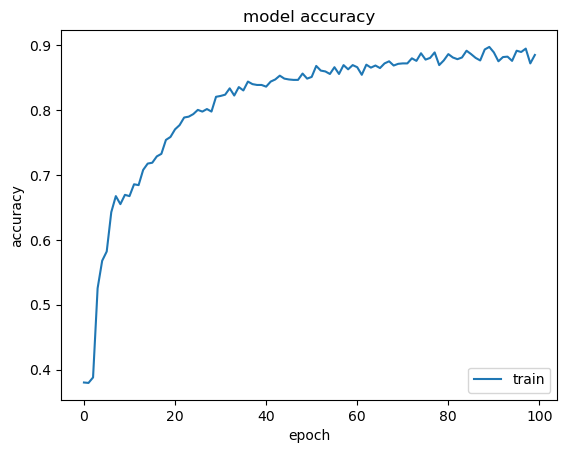

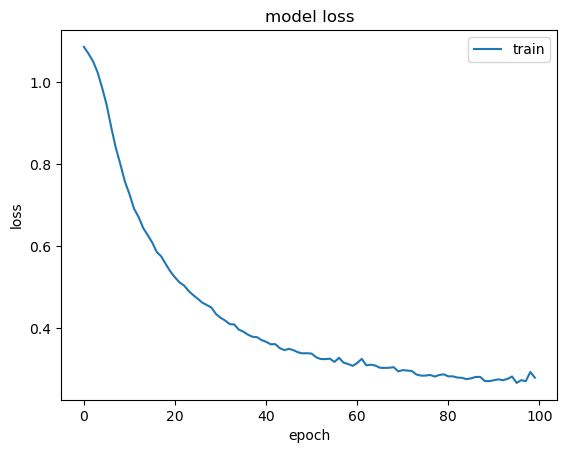

In [63]:
# Accuracy can be visualized
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# Error can be visualized
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

We can see that our model needs 3.07 seconds to train with the whole dataset. All the coordinates and angles were used, in total 100 columns. The results are positive and we can see how the model learn to classify the correctness of the different frames. Around the epoch 20 achieves a 0.8 accuracy and reaches 0.88 after 80 epochs. We can realise that the model is improving its accuracy gradually until it reaches the 80 epochs, then it doesn't achieve a better score.

In [64]:
# make predictions
y_all_hat = model1.predict(X_all_test)
y_all_pred = np.round(y_all_hat)
# evaluate predictions
acc = accuracy_score(y_all_test_onehot_encoded, y_all_pred)
print('Accuracy: %.3f' % acc)

12/12 [==============================] - 0s 496us/step
Accuracy: 0.891


The test data is used to test our model and we can se thath the result is good, giving us a 0.891 accuracy and 0.902 f1 score. It is pretty good and confirms that the model is able to classify the test data accurately. 

In [65]:
# Calculate the label-based F1 score
f1 = f1_score(y_all_test_onehot_encoded, y_all_pred, average='micro')

print('Label-based F1 Score: %.3f' % f1)

Label-based F1 Score: 0.902


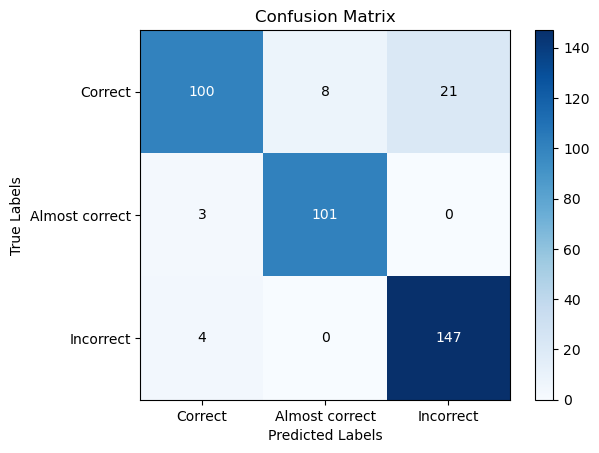

In [66]:
# Choices we have in our dataset for correctness
choices = ['Correct', 'Almost correct', 'Incorrect']

# Convert the predicted probabilities to binary predictions
y_all_pred = np.round(y_all_hat)

# Calculate the confusion matrix
cm = confusion_matrix(y_all_test_onehot_encoded.argmax(axis=1), y_all_pred.argmax(axis=1))

# Get the counts for each class
class_counts = np.sum(cm, axis=1)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

# Add the counts for each class
for i in range(len(choices)):
    for j in range(len(choices)):
        plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='white' if cm[i, j] > class_counts[i] / 2 else 'black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(choices)), choices)
plt.yticks(np.arange(len(choices)), choices)
plt.show()


The confusion matrix summarizes the predictions made by a classification model. It shows the counts of true positives, true negatives, false positives, and false negatives. The diagonal elements represent correct predictions, while off-diagonal elements indicate misclassifications. Row sums show the total instances for each true class, and column sums indicate the total predicted instances for each predicted class. The confusion matrix provides insights into the model's performance, misclassifications, and the distribution of true labels. It is a useful tool for evaluating and understanding the classification results.  It means that the model understood how to differentiate the classes. For the labels correct and almost correct the errors are small, while the almost correct label is being predicted less accurately. With this results we can start the second part of the research.

The goal of this project is to understand whether the implementation of dimensionality reduction techniques is feasible with 3D Skeleton data. In the case we can implement these kind of algorithms over the data, we are going to try to answer the next questions:

- Can we identify specific parts of the body or dimensions when tryng to understand the correctness, using dimensionality reduction technique?
- Can we improve the accuracy of the model using less dimensions?
- Does the model train faster with less dimensions?

### Dimensionality Reduction

Dimensionality reduction is a technique used in machine learning and data analysis to reduce the number of input features or variables in a dataset. The high dimensionality of data can often lead to challenges such as increased computational complexity, overfitting, and difficulty in visualization.

Dimensionality reduction methods aim to transform the original dataset into a lower-dimensional representation while preserving important information or patterns present in the data. These methods can be broadly categorized into two types: feature selection and feature extraction.

#### Feature Selection

Feature selection is the process of reducing the number of input variables when developing a predictive model. Statistical-based feature selection methods involve evaluating the relationship between each input variable and the target variable using statistics and selecting those input variables that have the strongest relationship with the target variable.

Before exploring the relationship between the dimensions and the target dimension, we need to transform the "Correctness" dimension in our dataset into numerical values. This conversion is necessary to facilitate the analysis and understanding of the data.

To begin, we will utilize the concept of feature importance, which helps us determine the significance of each dimension in predicting the target variable. Specifically, we will employ the feature importance scores obtained from tree-based models. By training a decision tree on our dataset, we can extract these importance scores, which are tailored specifically for classification tasks. These scores provide insights into which dimensions carry the most information and have the strongest influence on predicting the correct class.

In addition to the feature importance approach, we will also utilize analysis of variance (ANOVA) as a second method to gain insights into the variance within the dataset. ANOVA enables us to assess the statistical significance of the relationships between the dimensions and the target dimension. It helps us determine if there are any significant differences in the means of the dimensions across different classes of correctness.

By combining these two methods, we can gain a comprehensive understanding of the importance of different dimensions and their impact on predicting the correctness of the target dimension. This analysis allows us to make informed decisions about feature selection and prioritize the dimensions that contribute the most to the prediction task.

In [67]:
# Correctnes mapping labels are defined
mapping_correctness = {'Almost correct': 1, 'Correct': 2, 'Incorrect': 3}

# Mapping is applied
df_final = df_final.replace({'Correctness': mapping_correctness})

In [68]:
df_final.to_csv('./df_final.csv', encoding='utf-8', header=True, index=False)
df_final

,Correctness,Subject,Hip_x,Hip_y,Hip_z,LHip_x,LHip_y,LHip_z,LKnee_x,LKnee_y,LKnee_z,LAnkle_x,LAnkle_y,LAnkle_z,RHip_x,RHip_y,RHip_z,RKnee_x,RKnee_y,RKnee_z,RAnkle_x,RAnkle_y,RAnkle_z,Spine_x,Spine_y,Spine_z,Neck_x,Neck_y,Neck_z,Head_x,Head_y,Head_z,HeadTop_x,HeadTop_y,HeadTop_z,LShoulder_x,LShoulder_y,LShoulder_z,LElbow_x,LElbow_y,LElbow_z,LWrist_x,LWrist_y,LWrist_z,RShoulder_x,RShoulder_y,RShoulder_z,RElbow_x,RElbow_y,RElbow_z,RWrist_x,RWrist_y,RWrist_z,LToe_x,LToe_y,LToe_z,TipLToe_x,TipLToe_y,TipLToe_z,RToe_x,RToe_y,RToe_z,TipRToe_x,TipRToe_y,TipRToe_z,LThumb_x,LThumb_y,LThumb_z,TipLHand_x,TipLHand_y,TipLHand_z,RThumb_x,RThumb_y,RThumb_z,TipRHand_x,TipRHand_y,TipRHand_z,Hip_LHip_LKnee,LHip_LKnee_LAnkle,LKnee_LAnkle_LToe,LKnee_LAnkle_TLFoot,Hip_RHip_RKnee,RHip_RKnee_RAnkle,RKnee_RAnkle_RToe,RKnee_RAnkle_TRFoot,LHip_Hip_Spine,RHip_Hip_Spine,Hip_Spine_Neck,Spine_Neck_Head,Neck_Head_HTop,Neck_LShoulder_LElbow,LShoulder_LElbow_LWrist,LElbow_LWrist_LThumb,LElbow_LWrist_TLHand,Neck_RShoulder_RElbow,RShoulder_RElbow_RWrist,RElbow_RWrist_RThumb,RElbow_RWrist_TRHand,Spine_Neck_LShoulder,Spine_Neck_RShoulder,LShoulder_Neck_Head,RShoulder_Neck_Head,Sequence,Part,coord_errors,angle_errors
0,1,s05,-0.158593,0.150440,0.987652,-0.161762,0.285970,0.973917,-0.214149,0.298231,0.518989,-0.266418,0.310506,0.062930,-0.155870,0.014717,0.999447,-0.201940,-0.018622,0.544892,-0.266737,-0.053825,0.091643,-0.129280,0.152238,1.223220,-0.117126,0.157871,1.473800,-0.033718,0.158850,1.560090,-0.089029,0.165501,1.660700,-0.163967,0.283950,1.442410,-0.236414,0.477646,1.25920,-0.142172,0.456684,1.493610,-0.156785,0.029293,1.442650,-0.248567,-0.175701,1.281750,-0.133096,-0.131713,1.503120,-0.108993,0.353927,0.040464,-0.036952,0.374615,0.037809,-0.116634,-0.109342,0.052151,-0.047473,-0.136975,0.043312,-0.117421,0.360125,1.485620,-0.232365,0.430712,1.528110,-0.101930,-0.044249,1.465980,-0.252409,-0.073796,1.53940,97.433912,179.969162,91.930811,90.129848,89.116826,177.647283,97.689150,95.545684,95.472227,85.364311,175.600876,138.747008,107.170502,151.598103,39.771520,95.622368,90.297436,156.557990,37.950010,88.247063,84.735900,77.121316,74.928603,113.058004,111.673278,5,first,0.122353,16.883871
1,1,s05,-0.162997,0.150301,0.988584,-0.167643,0.285845,0.975407,-0.214110,0.297991,0.519833,-0.265935,0.310376,0.063726,-0.158791,0.014569,0.999819,-0.201761,-0.018582,0.544947,-0.266677,-0.054069,0.091737,-0.133204,0.150143,1.224100,-0.118430,0.153856,1.474580,-0.035068,0.155133,1.560910,-0.090937,0.161738,1.661200,-0.165248,0.280429,1.445200,-0.237473,0.478807,1.26698,-0.140130,0.453494,1.499690,-0.157944,0.025313,1.443100,-0.249976,-0.179836,1.282540,-0.132423,-0.135334,1.502700,-0.108671,0.354000,0.040541,-0.036659,0.374783,0.037815,-0.116532,-0.109376,0.052111,-0.047353,-0.136898,0.043069,-0.116031,0.356928,1.489970,-0.229784,0.427512,1.535560,-0.100717,-0.047560,1.466780,-0.251375,-0.077186,1.53979,97.238681,179.341138,92.244900,90.382073,89.273469,177.238399,97.724661,95.615181,95.789834,85.047094,176.064985,139.380173,106.887396,152.110345,40.164917,95.723529,90.627869,156.753060,37.863894,89.378685,84.683727,77.365796,75.041432,112.254176,111.874575,5,first,0.122290,17.070138
2,3,s05,-0.169160,0.148634,0.989643,-0.175345,0.284144,0.976756,-0.215304,0.296915,0.520583,-0.265392,0.309757,0.064295,-0.163420,0.012934,1.000590,-0.200240,-0.019513,0.545128,-0.266403,-0.054841,0.092085,-0.136675,0.146810,1.224790,-0.119073,0.149050,1.475110,-0.035988,0.149253,1.561710,-0.092098,0.155511,1.661900,-0.165322,0.276331,1.447980,-0.237728,0.478144,1.27373,-0.137415,0.450379,1.504890,-0.159104,0.020647,1.443710,-0.251579,-0.184999,1.284050,-0.133788,-0.138854,1.503740,-0.108369,0.354015,0.040681,-0.036431,0.375074,0.038161,-0.116168,-0.109576,0.052008,-0.046927,-0.136897,0.042831,-0.114242,0.353738,1.493780,-0.226937,0.424724,1.541320,-0.101379,-0.051089,1.468430,-0.252494,-0.080139,1.54073,97.230521,178.742165,92.633480,90.674494,89.271018,176.306396,97.706167,95.580370,96.1732

##### Random Forest

In tree-based models, feature importance is a measure of the contribution of each feature in the model's decision-making process. It helps identify which dimensions are most informative or influential in predicting the correct class or target variable.

When a decision tree is built, it makes a series of splits at each internal node based on different features. The splits are chosen to maximize the separation or purity of the target classes in the resulting subsets. The feature that contributes the most to reducing impurity or increasing purity at each split is considered more important.

The feature importance scores can be normalized to sum up to 1 or scaled to a specific range, depending on the implementation. These scores help you understand which dimensions have the most significant impact on the model's predictions. Features with higher importance scores are considered more influential in determining the correct class, as they contribute more to the overall predictive power of the model.

By analyzing the feature importance, you can gain insights into the underlying relationships between the input dimensions and the target variable. It allows you to focus on the most relevant features and potentially improve the model's performance by selecting a subset of informative dimensions or by prioritizing feature engineering efforts.

However, it's important to note that feature importance scores from tree-based models should be interpreted with caution. They reflect the model's internal decision-making process and may not capture complex interactions or dependencies between features. That's the reason, the results will be compared with the results from ANOVA to compare if we have similar importance dimensions. 

In [69]:
df_final

,Correctness,Subject,Hip_x,Hip_y,Hip_z,LHip_x,LHip_y,LHip_z,LKnee_x,LKnee_y,LKnee_z,LAnkle_x,LAnkle_y,LAnkle_z,RHip_x,RHip_y,RHip_z,RKnee_x,RKnee_y,RKnee_z,RAnkle_x,RAnkle_y,RAnkle_z,Spine_x,Spine_y,Spine_z,Neck_x,Neck_y,Neck_z,Head_x,Head_y,Head_z,HeadTop_x,HeadTop_y,HeadTop_z,LShoulder_x,LShoulder_y,LShoulder_z,LElbow_x,LElbow_y,LElbow_z,LWrist_x,LWrist_y,LWrist_z,RShoulder_x,RShoulder_y,RShoulder_z,RElbow_x,RElbow_y,RElbow_z,RWrist_x,RWrist_y,RWrist_z,LToe_x,LToe_y,LToe_z,TipLToe_x,TipLToe_y,TipLToe_z,RToe_x,RToe_y,RToe_z,TipRToe_x,TipRToe_y,TipRToe_z,LThumb_x,LThumb_y,LThumb_z,TipLHand_x,TipLHand_y,TipLHand_z,RThumb_x,RThumb_y,RThumb_z,TipRHand_x,TipRHand_y,TipRHand_z,Hip_LHip_LKnee,LHip_LKnee_LAnkle,LKnee_LAnkle_LToe,LKnee_LAnkle_TLFoot,Hip_RHip_RKnee,RHip_RKnee_RAnkle,RKnee_RAnkle_RToe,RKnee_RAnkle_TRFoot,LHip_Hip_Spine,RHip_Hip_Spine,Hip_Spine_Neck,Spine_Neck_Head,Neck_Head_HTop,Neck_LShoulder_LElbow,LShoulder_LElbow_LWrist,LElbow_LWrist_LThumb,LElbow_LWrist_TLHand,Neck_RShoulder_RElbow,RShoulder_RElbow_RWrist,RElbow_RWrist_RThumb,RElbow_RWrist_TRHand,Spine_Neck_LShoulder,Spine_Neck_RShoulder,LShoulder_Neck_Head,RShoulder_Neck_Head,Sequence,Part,coord_errors,angle_errors
0,1,s05,-0.158593,0.150440,0.987652,-0.161762,0.285970,0.973917,-0.214149,0.298231,0.518989,-0.266418,0.310506,0.062930,-0.155870,0.014717,0.999447,-0.201940,-0.018622,0.544892,-0.266737,-0.053825,0.091643,-0.129280,0.152238,1.223220,-0.117126,0.157871,1.473800,-0.033718,0.158850,1.560090,-0.089029,0.165501,1.660700,-0.163967,0.283950,1.442410,-0.236414,0.477646,1.25920,-0.142172,0.456684,1.493610,-0.156785,0.029293,1.442650,-0.248567,-0.175701,1.281750,-0.133096,-0.131713,1.503120,-0.108993,0.353927,0.040464,-0.036952,0.374615,0.037809,-0.116634,-0.109342,0.052151,-0.047473,-0.136975,0.043312,-0.117421,0.360125,1.485620,-0.232365,0.430712,1.528110,-0.101930,-0.044249,1.465980,-0.252409,-0.073796,1.53940,97.433912,179.969162,91.930811,90.129848,89.116826,177.647283,97.689150,95.545684,95.472227,85.364311,175.600876,138.747008,107.170502,151.598103,39.771520,95.622368,90.297436,156.557990,37.950010,88.247063,84.735900,77.121316,74.928603,113.058004,111.673278,5,first,0.122353,16.883871
1,1,s05,-0.162997,0.150301,0.988584,-0.167643,0.285845,0.975407,-0.214110,0.297991,0.519833,-0.265935,0.310376,0.063726,-0.158791,0.014569,0.999819,-0.201761,-0.018582,0.544947,-0.266677,-0.054069,0.091737,-0.133204,0.150143,1.224100,-0.118430,0.153856,1.474580,-0.035068,0.155133,1.560910,-0.090937,0.161738,1.661200,-0.165248,0.280429,1.445200,-0.237473,0.478807,1.26698,-0.140130,0.453494,1.499690,-0.157944,0.025313,1.443100,-0.249976,-0.179836,1.282540,-0.132423,-0.135334,1.502700,-0.108671,0.354000,0.040541,-0.036659,0.374783,0.037815,-0.116532,-0.109376,0.052111,-0.047353,-0.136898,0.043069,-0.116031,0.356928,1.489970,-0.229784,0.427512,1.535560,-0.100717,-0.047560,1.466780,-0.251375,-0.077186,1.53979,97.238681,179.341138,92.244900,90.382073,89.273469,177.238399,97.724661,95.615181,95.789834,85.047094,176.064985,139.380173,106.887396,152.110345,40.164917,95.723529,90.627869,156.753060,37.863894,89.378685,84.683727,77.365796,75.041432,112.254176,111.874575,5,first,0.122290,17.070138
2,3,s05,-0.169160,0.148634,0.989643,-0.175345,0.284144,0.976756,-0.215304,0.296915,0.520583,-0.265392,0.309757,0.064295,-0.163420,0.012934,1.000590,-0.200240,-0.019513,0.545128,-0.266403,-0.054841,0.092085,-0.136675,0.146810,1.224790,-0.119073,0.149050,1.475110,-0.035988,0.149253,1.561710,-0.092098,0.155511,1.661900,-0.165322,0.276331,1.447980,-0.237728,0.478144,1.27373,-0.137415,0.450379,1.504890,-0.159104,0.020647,1.443710,-0.251579,-0.184999,1.284050,-0.133788,-0.138854,1.503740,-0.108369,0.354015,0.040681,-0.036431,0.375074,0.038161,-0.116168,-0.109576,0.052008,-0.046927,-0.136897,0.042831,-0.114242,0.353738,1.493780,-0.226937,0.424724,1.541320,-0.101379,-0.051089,1.468430,-0.252494,-0.080139,1.54073,97.230521,178.742165,92.633480,90.674494,89.271018,176.306396,97.706167,95.580370,96.1732

In [74]:
def random_forest_calculator(df_final):
    """
    Calculates the feature importances using a Random Forest classifier.

    Parameters:
        df_final (pandas.DataFrame): The DataFrame containing the data.

    Returns:
        List[Tuple[str, float]]: A list of tuples containing the feature name and its importance.
    """
    # Split the dataframe into features (X) and target (y)
    X = df_final[landmarks + angles]
    y = df_final['Correctness']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

    # Create a Random Forest classifier
    rf = RandomForestClassifier()

    # Train the classifier
    rf.fit(X_train, y_train)

    # Get the feature importances
    importance_scores = rf.feature_importances_

    # Round the importance scores to 4 digits
    importance_scores = importance_scores.round(4)

    # Create a dictionary of feature names and importances
    feature_importances = dict(zip(X_train.columns, importance_scores))

    # Sort the feature importances in descending order
    sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

    # Print the sorted feature importances
    for feature, importance in sorted_importances[:25]:
        print(f"Feature {feature}: {importance}")
    
    return feature_importances,sorted_importances


In [75]:
feature_importances,sorted_importances = random_forest_calculator(df_final)

Feature Neck_Head_HTop: 0.0812
Feature RElbow_y: 0.0568
Feature LShoulder_LElbow_LWrist: 0.0533
Feature LElbow_LWrist_TLHand: 0.0502
Feature Neck_LShoulder_LElbow: 0.0375
Feature LShoulder_y: 0.037
Feature LHip_Hip_Spine: 0.0337
Feature RShoulder_y: 0.0321
Feature RElbow_RWrist_TRHand: 0.0302
Feature Spine_Neck_LShoulder: 0.0296
Feature Spine_Neck_RShoulder: 0.0292
Feature RAnkle_y: 0.0275
Feature LElbow_LWrist_LThumb: 0.0273
Feature RHip_Hip_Spine: 0.0245
Feature RToe_y: 0.0176
Feature Spine_x: 0.0161
Feature RElbow_RWrist_RThumb: 0.0154
Feature Hip_y: 0.0142
Feature TipRHand_x: 0.014
Feature RShoulder_RElbow_RWrist: 0.0138
Feature LToe_z: 0.0136
Feature RShoulder_Neck_Head: 0.0134
Feature LShoulder_Neck_Head: 0.0133
Feature LAnkle_y: 0.0116
Feature RToe_z: 0.0116


This function calculates the importance scores of each feature in the dataset and are sorted based on their importance. A function is implemented that applies a cumulative threshold to retain the top features that contribute to 80% of the total importance. 

In [76]:
def select_features_by_cumulative_importance(feature_scores, cumulative_threshold):
    """
    Selects features based on their cumulative importance scores.

    Args:
        feature_scores (dict): A dictionary of feature scores, where the keys are feature names and the values are importance scores.
        cumulative_threshold (float): The cumulative importance threshold, expressed as a percentage between 0 and 1.

    Returns:
        list: A list of selected feature names.

    """
    
    # Sort the feature scores in descending order
    sorted_scores = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Calculate the cumulative sum of the feature scores
    cumulative_sum = np.cumsum([score for _, score in sorted_scores])
    
    # Find the index where the cumulative sum exceeds the threshold
    selected_index = np.argmax(cumulative_sum >= cumulative_threshold * cumulative_sum[-1])
    
    # Select the features up to the selected index
    selected_features = [feature for feature, _ in sorted_scores[:selected_index+1]]
    
    return selected_features


In [77]:
# 80% of the importance is going to be used as threshold
cumulative_threshold = 0.80
selected_features = select_features_by_cumulative_importance(feature_importances, cumulative_threshold)


In [78]:
selected_features

['Neck_Head_HTop',
 'RElbow_y',
 'LShoulder_LElbow_LWrist',
 'LElbow_LWrist_TLHand',
 'Neck_LShoulder_LElbow',
 'LShoulder_y',
 'LHip_Hip_Spine',
 'RShoulder_y',
 'RElbow_RWrist_TRHand',
 'Spine_Neck_LShoulder',
 'Spine_Neck_RShoulder',
 'RAnkle_y',
 'LElbow_LWrist_LThumb',
 'RHip_Hip_Spine',
 'RToe_y',
 'Spine_x',
 'RElbow_RWrist_RThumb',
 'Hip_y',
 'TipRHand_x',
 'RShoulder_RElbow_RWrist',
 'LToe_z',
 'RShoulder_Neck_Head',
 'LShoulder_Neck_Head',
 'LAnkle_y',
 'RToe_z',
 'RKnee_z',
 'LKnee_LAnkle_TLFoot',
 'LKnee_x',
 'LKnee_z',
 'LElbow_y',
 'LAnkle_x',
 'RAnkle_x',
 'Spine_y',
 'TipLToe_y',
 'Head_x']

The results reveal that the top features predominantly consist of angle measurements, specifically those related to the joints in the upper body. Notably, the angles involving the arms, shoulders, upper and lower back, and the connection between the neck, head, and head top exhibit significant importance in determining the correctness of the squat.

##### ANOVA

ANOVA (Analysis of Variance) is a statistical test used to compare the means of two or more groups to determine if there are statistically significant differences between them. It assesses whether the variation between group means is larger than the variation within each group.

ANOVA helps us to understand if there are significant differences in the means of certain dimensions (features) across different levels of the "Correctness" variable (target dimension). ANOVA will help us identify which dimensions have a strong relationship with the target variable, indicating their importance for predicting correctness.

Our results are sorted in descending order of the F-statistic and ascending order of the p-value to prioritize dimensions with larger F-statistics and lower p-values, indicating stronger relationships and statistical significance. The sorted results are printed, showing the dimensions with their corresponding F-statistics and p-values

In [79]:
# THe dimensions are going to be deleted in order to calculate the analyse the variance
df_final = df_final.drop(['Subject', 'Sequence', 'Part', 'coord_errors', 'angle_errors'], axis=1)

In [80]:
df_final

,Correctness,Hip_x,Hip_y,Hip_z,LHip_x,LHip_y,LHip_z,LKnee_x,LKnee_y,LKnee_z,LAnkle_x,LAnkle_y,LAnkle_z,RHip_x,RHip_y,RHip_z,RKnee_x,RKnee_y,RKnee_z,RAnkle_x,RAnkle_y,RAnkle_z,Spine_x,Spine_y,Spine_z,Neck_x,Neck_y,Neck_z,Head_x,Head_y,Head_z,HeadTop_x,HeadTop_y,HeadTop_z,LShoulder_x,LShoulder_y,LShoulder_z,LElbow_x,LElbow_y,LElbow_z,LWrist_x,LWrist_y,LWrist_z,RShoulder_x,RShoulder_y,RShoulder_z,RElbow_x,RElbow_y,RElbow_z,RWrist_x,RWrist_y,RWrist_z,LToe_x,LToe_y,LToe_z,TipLToe_x,TipLToe_y,TipLToe_z,RToe_x,RToe_y,RToe_z,TipRToe_x,TipRToe_y,TipRToe_z,LThumb_x,LThumb_y,LThumb_z,TipLHand_x,TipLHand_y,TipLHand_z,RThumb_x,RThumb_y,RThumb_z,TipRHand_x,TipRHand_y,TipRHand_z,Hip_LHip_LKnee,LHip_LKnee_LAnkle,LKnee_LAnkle_LToe,LKnee_LAnkle_TLFoot,Hip_RHip_RKnee,RHip_RKnee_RAnkle,RKnee_RAnkle_RToe,RKnee_RAnkle_TRFoot,LHip_Hip_Spine,RHip_Hip_Spine,Hip_Spine_Neck,Spine_Neck_Head,Neck_Head_HTop,Neck_LShoulder_LElbow,LShoulder_LElbow_LWrist,LElbow_LWrist_LThumb,LElbow_LWrist_TLHand,Neck_RShoulder_RElbow,RShoulder_RElbow_RWrist,RElbow_RWrist_RThumb,RElbow_RWrist_TRHand,Spine_Neck_LShoulder,Spine_Neck_RShoulder,LShoulder_Neck_Head,RShoulder_Neck_Head
0,1,-0.158593,0.150440,0.987652,-0.161762,0.285970,0.973917,-0.214149,0.298231,0.518989,-0.266418,0.310506,0.062930,-0.155870,0.014717,0.999447,-0.201940,-0.018622,0.544892,-0.266737,-0.053825,0.091643,-0.129280,0.152238,1.223220,-0.117126,0.157871,1.473800,-0.033718,0.158850,1.560090,-0.089029,0.165501,1.660700,-0.163967,0.283950,1.442410,-0.236414,0.477646,1.25920,-0.142172,0.456684,1.493610,-0.156785,0.029293,1.442650,-0.248567,-0.175701,1.281750,-0.133096,-0.131713,1.503120,-0.108993,0.353927,0.040464,-0.036952,0.374615,0.037809,-0.116634,-0.109342,0.052151,-0.047473,-0.136975,0.043312,-0.117421,0.360125,1.485620,-0.232365,0.430712,1.528110,-0.101930,-0.044249,1.465980,-0.252409,-0.073796,1.53940,97.433912,179.969162,91.930811,90.129848,89.116826,177.647283,97.689150,95.545684,95.472227,85.364311,175.600876,138.747008,107.170502,151.598103,39.771520,95.622368,90.297436,156.557990,37.950010,88.247063,84.735900,77.121316,74.928603,113.058004,111.673278
1,1,-0.162997,0.150301,0.988584,-0.167643,0.285845,0.975407,-0.214110,0.297991,0.519833,-0.265935,0.310376,0.063726,-0.158791,0.014569,0.999819,-0.201761,-0.018582,0.544947,-0.266677,-0.054069,0.091737,-0.133204,0.150143,1.224100,-0.118430,0.153856,1.474580,-0.035068,0.155133,1.560910,-0.090937,0.161738,1.661200,-0.165248,0.280429,1.445200,-0.237473,0.478807,1.26698,-0.140130,0.453494,1.499690,-0.157944,0.025313,1.443100,-0.249976,-0.179836,1.282540,-0.132423,-0.135334,1.502700,-0.108671,0.354000,0.040541,-0.036659,0.374783,0.037815,-0.116532,-0.109376,0.052111,-0.047353,-0.136898,0.043069,-0.116031,0.356928,1.489970,-0.229784,0.427512,1.535560,-0.100717,-0.047560,1.466780,-0.251375,-0.077186,1.53979,97.238681,179.341138,92.244900,90.382073,89.273469,177.238399,97.724661,95.615181,95.789834,85.047094,176.064985,139.380173,106.887396,152.110345,40.164917,95.723529,90.627869,156.753060,37.863894,89.378685,84.683727,77.365796,75.041432,112.254176,111.874575
2,3,-0.169160,0.148634,0.989643,-0.175345,0.284144,0.976756,-0.215304,0.296915,0.520583,-0.265392,0.309757,0.064295,-0.163420,0.012934,1.000590,-0.200240,-0.019513,0.545128,-0.266403,-0.054841,0.092085,-0.136675,0.146810,1.224790,-0.119073,0.149050,1.475110,-0.035988,0.149253,1.561710,-0.092098,0.155511,1.661900,-0.165322,0.276331,1.447980,-0.237728,0.478144,1.27373,-0.137415,0.450379,1.504890,-0.159104,0.020647,1.443710,-0.251579,-0.184999,1.284050,-0.133788,-0.138854,1.503740,-0.108369,0.354015,0.040681,-0.036431,0.375074,0.038161,-0.116168,-0.109576,0.052008,-0.046927,-0.136897,0.042831,-0.114242,0.353738,1.493780,-0.226937,0.424724,1.541320,-0.101379,-0.051089,1.468430,-0.252494,-0.080139,1.54073,97.230521,178.742165,92.633480,90.674494,89.271018,176.306396,97.706167,95.580370,96.173263,84.663996,176.040777,140.207451,106.915966,152.226860,40.643565,95.522265,90.346366,156.981307,37.646799,90.248

In [81]:
def anova_calculator(df_final):
    """
    Calculates the Analysis of Variance (ANOVA) for each column in the provided DataFrame.

    Parameters:
        df_final (pandas.DataFrame): The DataFrame containing the data to perform ANOVA on.

    Returns:
        pandas.DataFrame: A DataFrame with the F-statistic and p-value (ANOVA) for each column.
    """
    # Group the data by "Correctness"
    groups = df_final.groupby("Correctness")

    # Perform ANOVA test
    f_statistics = {}
    p_values_anova = {}
    for column in df_final.columns[1:]:
        f_statistic, p_value_anova = f_oneway(*(group[column] for _, group in groups))
        f_statistics[column] = f_statistic
        p_values_anova[column] = p_value_anova


    # Convert the results to a dataframe
    anova_results = pd.DataFrame({"F-statistic": f_statistics, "p-value (ANOVA)": p_values_anova})

    # Display the results
    print("ANOVA Results:")
    print(anova_results)
    
    return anova_results


In [82]:
anova_results = anova_calculator(df_final)

ANOVA Results:
                      F-statistic  p-value (ANOVA)
Hip_x                   85.206512     3.537158e-36
Hip_y                  200.172953     1.120859e-79
Hip_z                   24.209618     4.135079e-11
LHip_x                 118.004568     4.664725e-49
LHip_y                 267.126027    4.623017e-103
...                           ...              ...
RElbow_RWrist_TRHand  2151.336784     0.000000e+00
Spine_Neck_LShoulder  2500.383136     0.000000e+00
Spine_Neck_RShoulder  3454.137374     0.000000e+00
LShoulder_Neck_Head   2279.825000     0.000000e+00
RShoulder_Neck_Head   1085.848091    4.889060e-316

[100 rows x 2 columns]


In [83]:
sorted_anova_results = anova_results.sort_values(by=['F-statistic', 'p-value (ANOVA)'], ascending=[False, True])[:25]
sorted_anova_results

,F-statistic,p-value (ANOVA)
Spine_Neck_RShoulder,3454.137374,0.000000e+00
RElbow_y,3347.873410,0.000000e+00
LElbow_LWrist_TLHand,3058.857632,0.000000e+00
RShoulder_y,2951.577741,0.000000e+00
Spine_Neck_LShoulder,2500.383136,0.000000e+00
LShoulder_Neck_Head,2279.825000,0.000000e+00
RElbow_RWrist_TRHand,2151.336784,0.000000e+00
LShoulder_LElbow_LWrist,2137.804976,0.000000e+00
Neck_Head_HTop,1648.919745,0.000000e+00
LShoulder_y,1636.057053,0.000000e+00


The ANOVA results reinforce the significance of angles in determining the correctness of movements. The top features obtained from ANOVA, similar to the previous feature importance results, predominantly consist of angles. This consistency indicates that angles play a crucial role in identifying the correctness of movements. By extracting the common features from both lists, we can further explore and analyze their impact on determining movement correctness.

In [84]:
# Obtain the values into a list
sorted_anova_results_list = sorted_anova_results.index.values.tolist()

#Get the common values
common_values = list(set(selected_features).intersection(sorted_anova_results_list))
print(common_values)
print(len(common_values))


['LShoulder_Neck_Head', 'LElbow_LWrist_LThumb', 'RElbow_RWrist_RThumb', 'RShoulder_RElbow_RWrist', 'RToe_z', 'Spine_Neck_LShoulder', 'Spine_y', 'LShoulder_LElbow_LWrist', 'LElbow_LWrist_TLHand', 'RHip_Hip_Spine', 'RShoulder_Neck_Head', 'LElbow_y', 'LShoulder_y', 'Spine_Neck_RShoulder', 'Neck_LShoulder_LElbow', 'LToe_z', 'Neck_Head_HTop', 'RShoulder_y', 'RElbow_RWrist_TRHand', 'LHip_Hip_Spine', 'RElbow_y']
21


In [85]:
joints= []
angles = []

for item in common_values:
    if 'x' in item or 'y' in item or 'z' in item:
        joints.append(item)
    else:
        angles.append(item)

In [86]:
joints

['RToe_z',
 'Spine_y',
 'LElbow_y',
 'LShoulder_y',
 'LToe_z',
 'RShoulder_y',
 'RElbow_y']

In [87]:
angles

['LShoulder_Neck_Head',
 'LElbow_LWrist_LThumb',
 'RElbow_RWrist_RThumb',
 'RShoulder_RElbow_RWrist',
 'Spine_Neck_LShoulder',
 'LShoulder_LElbow_LWrist',
 'LElbow_LWrist_TLHand',
 'RHip_Hip_Spine',
 'RShoulder_Neck_Head',
 'Spine_Neck_RShoulder',
 'Neck_LShoulder_LElbow',
 'Neck_Head_HTop',
 'RElbow_RWrist_TRHand',
 'LHip_Hip_Spine']

The results indicate that the angles play a crucial role in understanding the correctness of the movement. The top features are primarily concentrated in the upper body region, including the shoulders, elbows, wrists, and the connections between them. Additionally, the angles related to the spine and hip are also significant. Notably, the coordinates of the body parts align with the angles, emphasizing the importance of the top part of the body and spine, with a notable exception for the right toe. Therefore, we will focus on selecting the top angles from the ANOVA and Random Forest results to proceed with the PCA analysis.

In [88]:
list_dimensions = sorted_anova_results_list + selected_features
for item in list_dimensions:
    if 'x' in item or 'y' in item or 'z' in item:
        joints.append(item)
    else:
        angles.append(item)


In [89]:
reduced_dimensions = list(dict.fromkeys(angles))
reduced_dimensions

['LShoulder_Neck_Head',
 'LElbow_LWrist_LThumb',
 'RElbow_RWrist_RThumb',
 'RShoulder_RElbow_RWrist',
 'Spine_Neck_LShoulder',
 'LShoulder_LElbow_LWrist',
 'LElbow_LWrist_TLHand',
 'RHip_Hip_Spine',
 'RShoulder_Neck_Head',
 'Spine_Neck_RShoulder',
 'Neck_LShoulder_LElbow',
 'Neck_Head_HTop',
 'RElbow_RWrist_TRHand',
 'LHip_Hip_Spine',
 'Hip_Spine_Neck',
 'LKnee_LAnkle_TLFoot']

We have successfully reduced our dataset from the initial 106 dimensions to a more focused set of 15 dimensions. The selected dimensions predominantly capture the top parts of the body, including the hips and spine, which aligns with the importance of these regions in understanding correct movement. The results consistently highlight the significance of angles related to the upper back and the connection between the neck and head-top. While the lower body also plays a role, the angles involving the hips, knees, and ankles can vary depending on the specific squat technique being performed, making it challenging to determine correctness solely based on these dimensions. These biomechanical considerations will be further explored and explained in detail in the thesis.

#### Feature Extraction

Feature extraction is a crucial step in data analysis and machine learning tasks. It involves transforming raw data into a representative set of features that capture the essential information and patterns within the data. These features serve as inputs to machine learning algorithms for training and prediction. Feature Extraction algorithms, which are a little bit more complex in comparison with feature selection, but at the same time are the proper ones if we are trying to discriminate values in a dataset with the intention of classifying. With Feature Extraction, we build combinations of the variables, solving the dimensionality problem, and still describing the data with sufficient accuracy.

##### PCA

Principal Component Analysis is a dimensionality reduction technique that transforms the original dimensions into a new set of uncorrelated variables called principal components. These components capture the maximum variance in the data, allowing you to represent the data with fewer dimensions. Generally speaking, we are going to search the bigger variance between our points. Most of the variance in your dataset would be explained by a small number of components, usually in 10% of the data can we find 95% of the variance.

Once we have obtained the dataframe with the selected features from the feature selection process, the next step is to normalize the data. Normalization is important to ensure that all the features are on a similar scale and have a similar range of values. Normalization can be achieved by applying a scaling technique such as standardization. Standardization transforms the data to have a mean of 0 and a standard deviation of 1.

After normalizing the data, we can proceed with applying PCA to generate the synthetic dimensions. In our case, we will generate three principal components using PCA. These components will be added to the original feature set, resulting in an expanded feature matrix. Each sample in the dataset will now be represented by the original features as well as the values in the three PCA dimensions.

By incorporating the PCA dimensions into the input data for the CNN, we provide the model with a more comprehensive representation of the data. The CNN can then learn to extract meaningful features from the combination of original features and synthetic dimensions, enhancing its ability to understand the correctness of the squat movement.

In [90]:
# the reduced dimensions are selected
df_reduced = df_final[df_final.columns.intersection(reduced_dimensions)]
df_reduced


,LKnee_LAnkle_TLFoot,LHip_Hip_Spine,RHip_Hip_Spine,Hip_Spine_Neck,Neck_Head_HTop,Neck_LShoulder_LElbow,LShoulder_LElbow_LWrist,LElbow_LWrist_LThumb,LElbow_LWrist_TLHand,RShoulder_RElbow_RWrist,RElbow_RWrist_RThumb,RElbow_RWrist_TRHand,Spine_Neck_LShoulder,Spine_Neck_RShoulder,LShoulder_Neck_Head,RShoulder_Neck_Head
0,90.129848,95.472227,85.364311,175.600876,107.170502,151.598103,39.771520,95.622368,90.297436,37.950010,88.247063,84.735900,77.121316,74.928603,113.058004,111.673278
1,90.382073,95.789834,85.047094,176.064985,106.887396,152.110345,40.164917,95.723529,90.627869,37.863894,89.378685,84.683727,77.365796,75.041432,112.254176,111.874575
2,90.674494,96.173263,84.663996,176.040777,106.915966,152.226860,40.643565,95.522265,90.346366,37.646799,90.248984,84.820687,77.807188,75.202370,111.839880,111.486567
3,90.442869,96.441385,84.399023,175.560824,106.900438,151.501357,40.322746,95.749256,89.464521,37.867480,90.283524,84.058500,78.045994,75.358129,111.712705,111.135588
4,89.582196,96.045753,84.795765,174.870854,106.883475,150.939186,40.242887,95.409460,89.177318,37.835763,90.351840,83.837216,78.237458,75.614261,111.292650,111.148646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,84.883212,103.776877,77.091063,159.439976,102.612865,170.195716,43.599704,88.594363,66.547360,39.795343,90.208844,64.788516,61.553827,54.222947,116.137187,109.313174
1916,86.900577,102.077373,78.786519,164.208104,101.667154,165.983672,46.934858,92.483461,69.968077,41.902218,95.027361,69.834261,61.822119,57.174956,115.164665,108.093291
1917,88.308199,100.358322,80.502034,167.806640,100.971394,158.000104,51.990738,96.130316,75.128512,45.645332,99.025541,77.229471,61.832801,59.624351,115.154917,107.608033
1918,89.250596,99.394340,81.463289,169.807936,99.627823,146.810623,58.919112,99.812939,81.012765,50.018876,102.478401,85.091152,61.102369,61.860378,115.933961,107.994986


In [91]:
# Normalize the selected features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(df_reduced)

# Perform PCA with 3 components
pca = PCA(n_components=3)

# Fit PCA on the normalized feature data
pca.fit(normalized_features)

# Transform the feature data
transformed_features = pca.transform(normalized_features)

# Retrieve the transformed feature data (three dimensions)
dimension_1 = transformed_features[:, 0]
dimension_2 = transformed_features[:, 1]
dimension_3 = transformed_features[:, 2]


In [92]:
# The Correctness and PC columns are added to the dataframe
df_normalized = pd.DataFrame(normalized_features, columns = df_reduced.columns.values)
df_normalized['Correctness'] = df_final['Correctness']
df_normalized['PC1'] = dimension_1
df_normalized['PC2'] = dimension_2
df_normalized['PC3'] = dimension_3
df_normalized

,LKnee_LAnkle_TLFoot,LHip_Hip_Spine,RHip_Hip_Spine,Hip_Spine_Neck,Neck_Head_HTop,Neck_LShoulder_LElbow,LShoulder_LElbow_LWrist,LElbow_LWrist_LThumb,LElbow_LWrist_TLHand,RShoulder_RElbow_RWrist,RElbow_RWrist_RThumb,RElbow_RWrist_TRHand,Spine_Neck_LShoulder,Spine_Neck_RShoulder,LShoulder_Neck_Head,RShoulder_Neck_Head,Correctness,PC1,PC2,PC3
0,1.603999,-0.631800,0.643688,1.166860,-0.014153,-0.011087,0.094290,0.279470,0.597902,-0.267333,0.228039,0.521521,0.719339,0.623873,-0.594645,0.120149,1,-1.637416,-0.396913,-1.835980
1,1.622269,-0.598245,0.610325,1.198276,-0.029423,0.029163,0.125486,0.285621,0.615763,-0.273441,0.300834,0.518008,0.745860,0.633286,-0.671973,0.145270,1,-1.658402,-0.432989,-1.871501
2,1.643450,-0.557737,0.570032,1.196638,-0.027882,0.038319,0.163443,0.273383,0.600547,-0.288841,0.356819,0.527230,0.793743,0.646714,-0.711828,0.096849,3,-1.677317,-0.421708,-1.894715
3,1.626672,-0.529410,0.542163,1.164149,-0.028720,-0.018689,0.138002,0.287185,0.552882,-0.273187,0.359041,0.475908,0.819649,0.659709,-0.724062,0.053048,3,-1.668873,-0.364496,-1.864247
4,1.564329,-0.571208,0.583891,1.117443,-0.029635,-0.062863,0.131669,0.266523,0.537359,-0.275437,0.363436,0.461008,0.840419,0.681079,-0.764471,0.054677,3,-1.697594,-0.319843,-1.793487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1.223957,0.245569,-0.226459,0.072893,-0.259979,1.450263,0.397864,-0.147890,-0.685816,-0.136436,0.354237,-0.821637,-0.969433,-1.103653,-0.298429,-0.174382,1,1.297534,-1.415876,-0.852311
1916,1.370086,0.066020,-0.048137,0.395658,-0.310988,1.119292,0.662342,0.088599,-0.500923,0.013013,0.664205,-0.481881,-0.940329,-0.857359,-0.391985,-0.326618,1,0.779540,-1.470239,-1.189048
1917,1.472047,-0.115594,0.132293,0.639251,-0.348515,0.491965,1.063272,0.310357,-0.221995,0.278527,0.921401,0.016075,-0.939170,-0.653000,-0.392923,-0.387176,1,0.312507,-1.309634,-1.535514
1918,1.540310,-0.217437,0.233394,0.774723,-0.420984,-0.387274,1.612691,0.534290,0.096055,0.588760,1.143518,0.545442,-1.018408,-0.466443,-0.317979,-0.338886,1,-0.003163,-0.976542,-1.866776


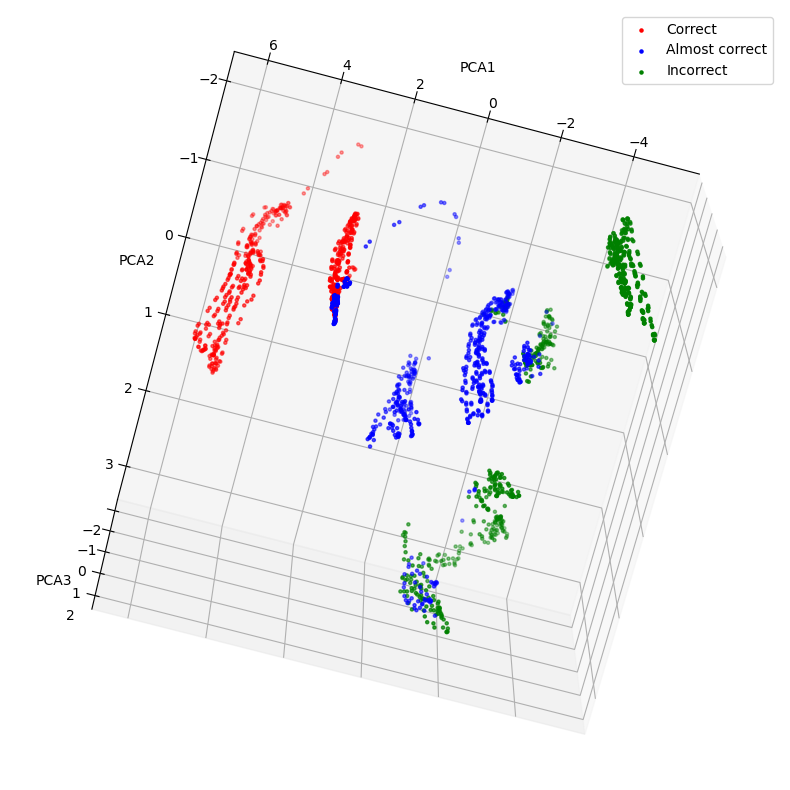

In [93]:
#mapping_correctness = {'Almost correct': 1, 'Correct': 2, 'Incorrect': 3}

# Separate the data based on correctness labels
correct_data = df_normalized[df_normalized['Correctness'] == 2]
almost_correct_data = df_normalized[df_normalized['Correctness'] == 1]
incorrect_data = df_normalized[df_normalized['Correctness'] == 3]
# Create a scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot correct data in blue
ax.scatter(correct_data['PC1'], correct_data['PC2'], correct_data['PC3'], c='red', label='Correct', s = 5)

# Plot correct data in blue
ax.scatter(almost_correct_data['PC1'], almost_correct_data['PC2'], almost_correct_data['PC3'], c='blue', label='Almost correct', s = 5)

# Plot incorrect data in red
ax.scatter(incorrect_data['PC1'], incorrect_data['PC2'], incorrect_data['PC3'], c='green', label='Incorrect', s = 5)

# Set labels and legend
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend()

# Set the viewing perspective by adjusting the elevation and azimuth angles
ax.view_init(elev=105, azim=105)  # Adjust the values to rotate the plot

# Show the plot
plt.show()


By observing the plot, we can make some observations about the separation between the classes:

- There is some overlap between the "Correct" and "Almost correct" classes, as we can see areas where the green and blue points are close to each other. This suggests that these two classes share some similarities in their PCA dimensions.

- The "Correct" class appears to be more distinct and separate from the other two classes. We can see regions where the red points are relatively isolated from the green and blue points.

- The distribution and arrangement of the data points in the 3D space provide insights into the relationship between the PCA dimensions and the correctness labels. It appears that certain combinations of PCA values are more associated with a specific correctness label.

We can realise that the PC dimensions, created from the feature selection, help us to understand and recognise correctnes. These dimensions are going to be added to the angles dataframe with the selected features and will be used to train the CNN model. 

### Model 2

A second model is going to be trained to process the information with reduced data and compare the results with the results obtained with the first model. The normalized data is going to be used to train our model as we did in the first part of the research

In [94]:
df_normalized

,LKnee_LAnkle_TLFoot,LHip_Hip_Spine,RHip_Hip_Spine,Hip_Spine_Neck,Neck_Head_HTop,Neck_LShoulder_LElbow,LShoulder_LElbow_LWrist,LElbow_LWrist_LThumb,LElbow_LWrist_TLHand,RShoulder_RElbow_RWrist,RElbow_RWrist_RThumb,RElbow_RWrist_TRHand,Spine_Neck_LShoulder,Spine_Neck_RShoulder,LShoulder_Neck_Head,RShoulder_Neck_Head,Correctness,PC1,PC2,PC3
0,1.603999,-0.631800,0.643688,1.166860,-0.014153,-0.011087,0.094290,0.279470,0.597902,-0.267333,0.228039,0.521521,0.719339,0.623873,-0.594645,0.120149,1,-1.637416,-0.396913,-1.835980
1,1.622269,-0.598245,0.610325,1.198276,-0.029423,0.029163,0.125486,0.285621,0.615763,-0.273441,0.300834,0.518008,0.745860,0.633286,-0.671973,0.145270,1,-1.658402,-0.432989,-1.871501
2,1.643450,-0.557737,0.570032,1.196638,-0.027882,0.038319,0.163443,0.273383,0.600547,-0.288841,0.356819,0.527230,0.793743,0.646714,-0.711828,0.096849,3,-1.677317,-0.421708,-1.894715
3,1.626672,-0.529410,0.542163,1.164149,-0.028720,-0.018689,0.138002,0.287185,0.552882,-0.273187,0.359041,0.475908,0.819649,0.659709,-0.724062,0.053048,3,-1.668873,-0.364496,-1.864247
4,1.564329,-0.571208,0.583891,1.117443,-0.029635,-0.062863,0.131669,0.266523,0.537359,-0.275437,0.363436,0.461008,0.840419,0.681079,-0.764471,0.054677,3,-1.697594,-0.319843,-1.793487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1.223957,0.245569,-0.226459,0.072893,-0.259979,1.450263,0.397864,-0.147890,-0.685816,-0.136436,0.354237,-0.821637,-0.969433,-1.103653,-0.298429,-0.174382,1,1.297534,-1.415876,-0.852311
1916,1.370086,0.066020,-0.048137,0.395658,-0.310988,1.119292,0.662342,0.088599,-0.500923,0.013013,0.664205,-0.481881,-0.940329,-0.857359,-0.391985,-0.326618,1,0.779540,-1.470239,-1.189048
1917,1.472047,-0.115594,0.132293,0.639251,-0.348515,0.491965,1.063272,0.310357,-0.221995,0.278527,0.921401,0.016075,-0.939170,-0.653000,-0.392923,-0.387176,1,0.312507,-1.309634,-1.535514
1918,1.540310,-0.217437,0.233394,0.774723,-0.420984,-0.387274,1.612691,0.534290,0.096055,0.588760,1.143518,0.545442,-1.018408,-0.466443,-0.317979,-0.338886,1,-0.003163,-0.976542,-1.866776


In [95]:
# Split the data into input features and target variable
X = df_normalized[['RHip_Hip_Spine', 'RShoulder_Neck_Head', 'RShoulder_RElbow_RWrist',\
                   'Spine_Neck_RShoulder', 'LShoulder_Neck_Head', 'LElbow_LWrist_LThumb',\
                   'Neck_Head_HTop', 'LElbow_LWrist_TLHand', 'LShoulder_LElbow_LWrist',\
                   'LHip_Hip_Spine', 'RElbow_RWrist_TRHand', 'Spine_Neck_LShoulder',\
                   'Neck_LShoulder_LElbow', 'Hip_Spine_Neck', 'PC1', 'PC2', 'PC3']].values
y = df_normalized['Correctness'].values

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
# Constants
num_classes = 3  # Number of classes (Correct or Incorrect)
input_shape = (X.shape[1],)  # Input shape for the CNN model

In [97]:
# Split the reduced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y_train.reshape(len(y_train), 1)
y_train_onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = y_test.reshape(len(y_test), 1)
y_test_onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

/Users/daniel/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/daniel/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [99]:
# Build the CNN model
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Reshape((input_shape[0], 1), input_shape=input_shape))
model2.add(tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'))
model2.add(tf.keras.layers.GlobalMaxPooling1D())
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dense(num_classes, activation='softmax')) 

In [100]:
# Compile the model
model2.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

After the model is compiled, we are going to fit the data for 100 epocs to see how much time and accuracy we achieve with the reduced data

In [101]:
# Start the timer
start_time = time.time()

# Train the model
batch_size = 64
epochs = 100
history = model2.fit(X_train, y_train_onehot_encoded, batch_size=batch_size, epochs=epochs, verbose=2)

# Calculate the training time
training_time = time.time() - start_time

# Print the training time
print(f"Training Time: {training_time:.2f} seconds")

Epoch 1/100
24/24 - 0s - loss: 0.8981 - accuracy: 0.5462 - 203ms/epoch - 8ms/step
Epoch 2/100
24/24 - 0s - loss: 0.6952 - accuracy: 0.6862 - 18ms/epoch - 741us/step
Epoch 3/100
24/24 - 0s - loss: 0.5669 - accuracy: 0.7643 - 13ms/epoch - 544us/step
Epoch 4/100
24/24 - 0s - loss: 0.4797 - accuracy: 0.8307 - 12ms/epoch - 493us/step
Epoch 5/100
24/24 - 0s - loss: 0.4091 - accuracy: 0.8555 - 13ms/epoch - 560us/step
Epoch 6/100
24/24 - 0s - loss: 0.3482 - accuracy: 0.8652 - 15ms/epoch - 617us/step
Epoch 7/100
24/24 - 0s - loss: 0.3061 - accuracy: 0.8789 - 14ms/epoch - 591us/step
Epoch 8/100
24/24 - 0s - loss: 0.2784 - accuracy: 0.8887 - 14ms/epoch - 600us/step
Epoch 9/100
24/24 - 0s - loss: 0.2606 - accuracy: 0.8913 - 13ms/epoch - 553us/step
Epoch 10/100
24/24 - 0s - loss: 0.2510 - accuracy: 0.8900 - 13ms/epoch - 530us/step
Epoch 11/100
24/24 - 0s - loss: 0.2394 - accuracy: 0.8984 - 15ms/epoch - 609us/step
Epoch 12/100
24/24 - 0s - loss: 0.2314 - accuracy: 0.8997 - 15ms/epoch - 606us/step
Ep

### Results 2

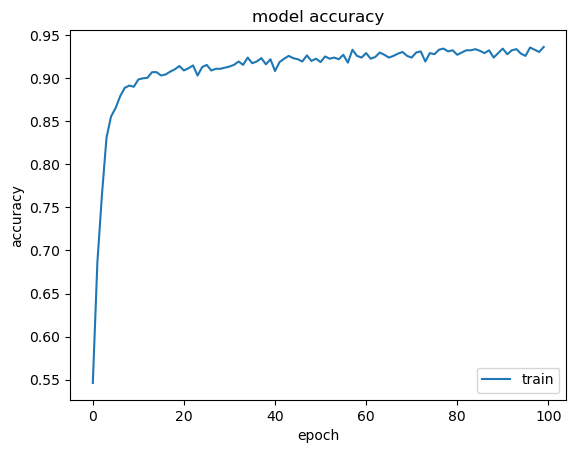

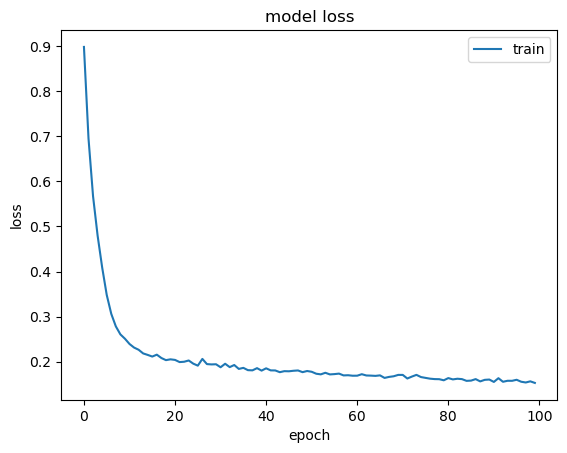

In [102]:
# Accuracy can be visualized
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# Error can be visualized
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

The training process of the model was completed in approximately 1.70 seconds for 100 epochs. During this period, we observed that the model exhibited a gradual improvement in minimizing the difference between the predicted and actual values. This can be seen in the decreasing trend of the loss values over the epochs, indicating that the model is learning and becoming more accurate in its predictions.

Notably, the accuracy of the model also showed significant progress throughout the training. After the initial phase, the accuracy steadily increased, reaching its highest and lowest points around the 10th epoch. This suggests that the model is continuously improving its performance and becoming more adept at correctly classifying the data.

When comparing this model with the one trained using all dimensions, we observed a remarkable difference. The model trained with the selected dimensions achieved its highest accuracy of 0.9 in just 10 epochs, while the model using all dimensions required 90 epochs to reach a similar accuracy level. Additionally, the training time for the model with selected dimensions was notably faster, taking only 1.70 seconds compared to the 3.07 seconds of the model with all dimensions. This implies that by choosing the appropriate dimensions, we can significantly enhance both the training speed and accuracy of the model.

In [103]:
# make predictions
yhat = model2.predict(X_test)
y_pred = np.round(yhat)
# evaluate predictions
acc = accuracy_score(y_test_onehot_encoded, y_pred)
print('Accuracy: %.3f' % acc)

12/12 [==============================] - 0s 382us/step
Accuracy: 0.943


In [104]:
# Calculate the label-based F1 score
f1 = f1_score(y_test_onehot_encoded, y_pred, average='micro')

print('Label-based F1 Score: %.3f' % f1)

Label-based F1 Score: 0.943


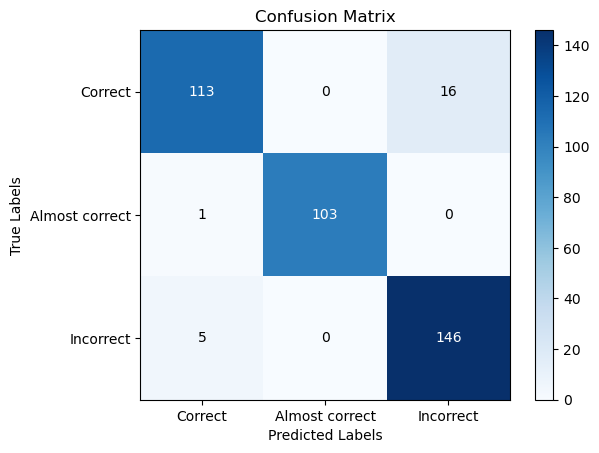

In [105]:
# Convert the predicted probabilities to binary predictions
y_pred = np.round(yhat)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_onehot_encoded.argmax(axis=1), y_pred.argmax(axis=1))

# Get the counts for each class
class_counts = np.sum(cm, axis=1)

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

# Add the counts for each class
for i in range(len(choices)):
    for j in range(len(choices)):
        plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='white' if cm[i, j] > class_counts[i] / 2 else 'black')

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(np.arange(len(choices)), choices)
plt.yticks(np.arange(len(choices)), choices)
plt.show()


The second model shows slight improvements in accuracy and F1 score compared to the first model. The accuracy and F1 score remain the same at 0.943, while we had 0.891 accuracy and 0.92 f1-score with the model containing all the dimensions, indicating a 5% improvement. The confusion matrix also reflects these improvements, with higher accuracy for the correct and nearly correct classes, but slightly lower accuracy for the incorrect class. Overall, the results demonstrate better performance than the first model, suggesting the potential for implementing these algorithms in future research endeavors and confirming the potential that dimensionality reduction algorithms have used with 3D Skeleton data.

### Analysis

This research highlights the significant impact of dimensionality reduction algorithms, such as Random Forest and PCA, on 3D skeleton data analysis. By effectively reducing the number of dimensions, these algorithms not only improve training time but also yield remarkable enhancements in accuracy. Random Forest provides insights into the influential dimensions for predicting correctness, while ANOVA helps identify dimensions with strong relationships to the target variable. Moreover, PCA transforms the original dimensions into uncorrelated variables that capture maximum data variance, effectively representing the data with fewer dimensions.

We can appreciate the immense potential that dimensionality reduction techniques offer for further exploration and expansion. By building upon this foundation, researchers can advance the understanding of 3D skeleton data analysis, enhance model performance, and unlock new possibilities for various applications in human movement research and beyond. Additionally, the generation of synthetic data plays a vital role in addressing dataset imbalances and augmenting training sample sizes. Through interpolation techniques, synthetic data creation effectively enhances model performance by ensuring a more balanced representation of the target classes.

This research serves as a stepping stone for future investigations in several directions. Exploring alternative models such as HMM or Transformers holds promise in comprehending the underlying sequential patterns of movement sequences, going beyond the limitations of frame-level analysis. Additionally, the alignment and sequence extraction algorithms employed here can be harnessed for other projects requiring video sequence normalization, providing the basis for further analysis and comparisons across diverse movement sequences.

I hope future students and researchers can use this code and that the research helps them providing a solid framework to build upon. By improving the existing models, refining the code implementation, and delving into additional functions, there is ample room to advance the field.